In [1]:
import pandas as pd
import numpy as np
from  sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
bureau_df = pd.read_csv('bureau_data.csv')
bureau_df.head()
bureau_df.shape

(50000, 8)

In [ ]:
customer_df = pd.read_csv('customers.csv')
customer_df.head()
customer_df.shape

(50000, 12)

In [ ]:
loans_df = pd.read_csv('loans.csv')
loans_df

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,L49996,C49996,Personal,Unsecured,610000,535000,10700.0,96300,428000,22,385199,178470,2024-07-22,2024-08-15,False
49996,L49997,C49997,Auto,Secured,4211000,3243000,64860.0,583740,2594400,15,1656484,1040735,2024-07-22,2024-07-29,False
49997,L49998,C49998,Home,Secured,4097000,3740000,74800.0,673200,2992000,37,912691,355461,2024-07-22,2024-07-25,False
49998,L49999,C49999,Home,Secured,1871000,1630000,32600.0,293400,1304000,37,300035,179453,2024-07-22,2024-07-29,False


In [5]:
df = pd.merge(customer_df , bureau_df , on='cust_id')
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001,4,2,120,0,0,5,10


In [6]:
df = pd.merge(df,loans_df , on='cust_id')
print(df.shape)
df.head()

(50000, 33)


,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [7]:
df['default'] = df['default'].astype(int)

In [8]:
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,0
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,0
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,0
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,0
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,0


In [9]:
X = df.drop('default', axis=1)
y = df['default']
X_train , X_test , y_train , y_test = train_test_split(X , y , stratify=y, test_size=0.25,random_state=42)
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis =1)

In [10]:
print(df_train.shape)
df_train.head()

(37500, 33)


,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,23442000,468840.0,4219560,18753600,28,5000000,4820526,2020-10-31,2020-11-11,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,1149000,22980.0,206820,919200,50,467229,216697,2022-10-22,2022-10-27,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,11296000,225920.0,2033280,9036800,32,1656773,1383842,2023-12-04,2023-12-29,0
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,1695000,33900.0,305100,1356000,40,1023442,626203,2020-06-18,2020-07-07,0
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,905000,18100.0,162900,724000,15,651599,585099,2020-11-12,2020-12-07,0


In [11]:
df_test.shape

(12500, 33)

In [12]:
df_test.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
19205,C19206,36,M,Married,Self-Employed,3728000,3,Owned,24,Jaipur,...,9890000,197800.0,1780200,7912000,46,1745379,806208,2021-06-24,2021-07-23,0
15514,C15515,43,F,Single,Self-Employed,2493000,0,Owned,23,Delhi,...,3087000,61740.0,555660,2469600,18,1675530,1019647,2021-02-09,2021-02-18,0
30367,C30368,30,M,Married,Self-Employed,3114000,4,Owned,27,Delhi,...,3323000,66460.0,598140,2658400,35,1613282,1000932,2022-08-06,2022-08-21,0
35347,C35348,37,F,Single,Salaried,570000,2,Owned,5,Pune,...,1559000,31180.0,280620,1247200,46,398614,167679,2023-02-03,2023-02-04,0
41814,C41815,48,F,Single,Salaried,662000,0,Mortgage,23,Chennai,...,1351000,27020.0,243180,1080800,44,383925,262180,2023-09-27,2023-10-17,1


In [13]:
df_train.isnull().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd                       0
enquiry_count                   0
credit_utilization_ratio        0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_a

In [14]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [15]:
mode_residence_type = df_train.residence_type.mode()[0]
mode_residence_type

'Owned'

In [16]:
df_train.residence_type.fillna(mode_residence_type, inplace=True)

/var/folders/mm/6cdy0j9x6bl5k77gk81jj1n40000gn/T/ipykernel_4150/4212427601.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence_type, inplace=True)


In [17]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [18]:
df_train[df_train.residence_type.isnull()]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default


In [19]:
df_train.isnull().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_count                  0
credit_utilization_ratio       0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_

In [20]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [21]:
df_test.fillna(mode_residence_type,inplace=True)

In [22]:
df_train.duplicated().sum()

0

In [23]:
df.processing_fee.describe()

count    5.000000e+04
mean     8.049471e+04
std      1.173123e+05
min      0.000000e+00
25%      1.934000e+04
50%      4.480000e+04
75%      9.224000e+04
max      5.698030e+06
Name: processing_fee, dtype: float64

In [24]:
df_train.dtypes

cust_id                         object
age                              int64
gender                          object
marital_status                  object
employment_status               object
income                           int64
number_of_dependants             int64
residence_type                  object
years_at_current_address         int64
city                            object
state                           object
zipcode                          int64
number_of_open_accounts          int64
number_of_closed_accounts        int64
total_loan_months                int64
delinquent_months                int64
total_dpd                        int64
enquiry_count                    int64
credit_utilization_ratio         int64
loan_id                         object
loan_purpose                    object
loan_type                       object
sanction_amount                  int64
loan_amount                      int64
processing_fee                 float64
gst                      

In [25]:
continuous_columns = df_train.select_dtypes(['int64', 'float64']).columns
continuous_columns

Index(['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application', 'default'],
      dtype='object')

In [26]:
df_train.select_dtypes('float64').columns

Index(['processing_fee'], dtype='object')

In [27]:
df_train.processing_fee = df_train.processing_fee.astype('int64')

In [28]:
df_train.dtypes

cust_id                        object
age                             int64
gender                         object
marital_status                 object
employment_status              object
income                          int64
number_of_dependants            int64
residence_type                 object
years_at_current_address        int64
city                           object
state                          object
zipcode                         int64
number_of_open_accounts         int64
number_of_closed_accounts       int64
total_loan_months               int64
delinquent_months               int64
total_dpd                       int64
enquiry_count                   int64
credit_utilization_ratio        int64
loan_id                        object
loan_purpose                   object
loan_type                      object
sanction_amount                 int64
loan_amount                     int64
processing_fee                  int64
gst                             int64
net_disburse

In [29]:
categorical_columns = df_train.select_dtypes('object').columns
categorical_columns = list(categorical_columns)
categorical_columns

['cust_id',
 'gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_id',
 'loan_purpose',
 'loan_type',
 'disbursal_date',
 'installment_start_dt']

In [30]:
for x in  ['disbursal_date','cust_id','loan_id','installment_start_dt'] :
    categorical_columns.remove(x)

categorical_columns

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_purpose',
 'loan_type']

In [31]:
continuous_columns = list(continuous_columns)

In [32]:
continuous_columns.remove('zipcode' )
continuous_columns.remove('default' )

In [33]:
continuous_columns

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application']

In [34]:
categorical_columns.append('default')
categorical_columns

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_purpose',
 'loan_type',
 'default']

In [35]:
df_train[continuous_columns].describe()

,age,income,number_of_dependants,years_at_current_address,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application
count,37500.000000,3.750000e+04,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,37500.000000,37500.000000,3.750000e+04,3.750000e+04,3.750000e+04,3.750000e+04,3.750000e+04,37500.000000,3.750000e+04,3.750000e+04
mean,39.540587,2.633326e+06,1.944533,15.997787,2.502907,1.001120,76.11104,4.844853,26.672613,5.008533,43.424880,4.699692e+06,3.996068e+06,8.029068e+04,7.192922e+05,3.196854e+06,25.961040,1.333820e+06,9.862989e+05
std,9.858344,2.623781e+06,1.535943,8.921041,1.119070,0.814021,43.76852,5.841396,32.779424,2.029236,29.392857,6.257833e+06,5.371862e+06,1.131281e+05,9.669352e+05,4.297490e+06,12.447444,1.213674e+06,1.043145e+06
min,18.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,-1.000000e+00,0.000000e+00
25%,33.000000,8.020000e+05,0.000000,8.000000,1.000000,0.000000,42.00000,0.000000,0.000000,4.000000,18.000000,1.142000e+06,9.610000e+05,1.922000e+04,1.729800e+05,7.688000e+05,16.000000,4.221975e+05,2.870402e+05
50%,39.000000,1.885000e+06,2.000000,16.000000,3.000000,1.000000,71.00000,3.000000,13.000000,5.000000,39.000000,2.644000e+06,2.230000e+06,4.460000e+04,4.014000e+05,1.784000e+06,24.000000,9.974275e+05,6.650145e+05
75%,46.000000,3.326250e+06,3.000000,24.000000,4.000000,2.000000,107.00000,8.000000,46.000000,6.000000,67.000000,5.178000e+06,4.619000e+06,9.242000e+04,8.314200e+05,3.695200e+06,35.000000,1.784879e+06,1.234063e+06
max,70.000000,1.199900e+07,5.000000,31.000000,4.000000,2.000000,223.00000,24.000000,171.000000,9.000000,99.000000,5.217500e+07,4.781900e+07,5.293543e+06,8.607420e+06,3.825520e+07,59.000000,5.000000e+06,7.846643e+06


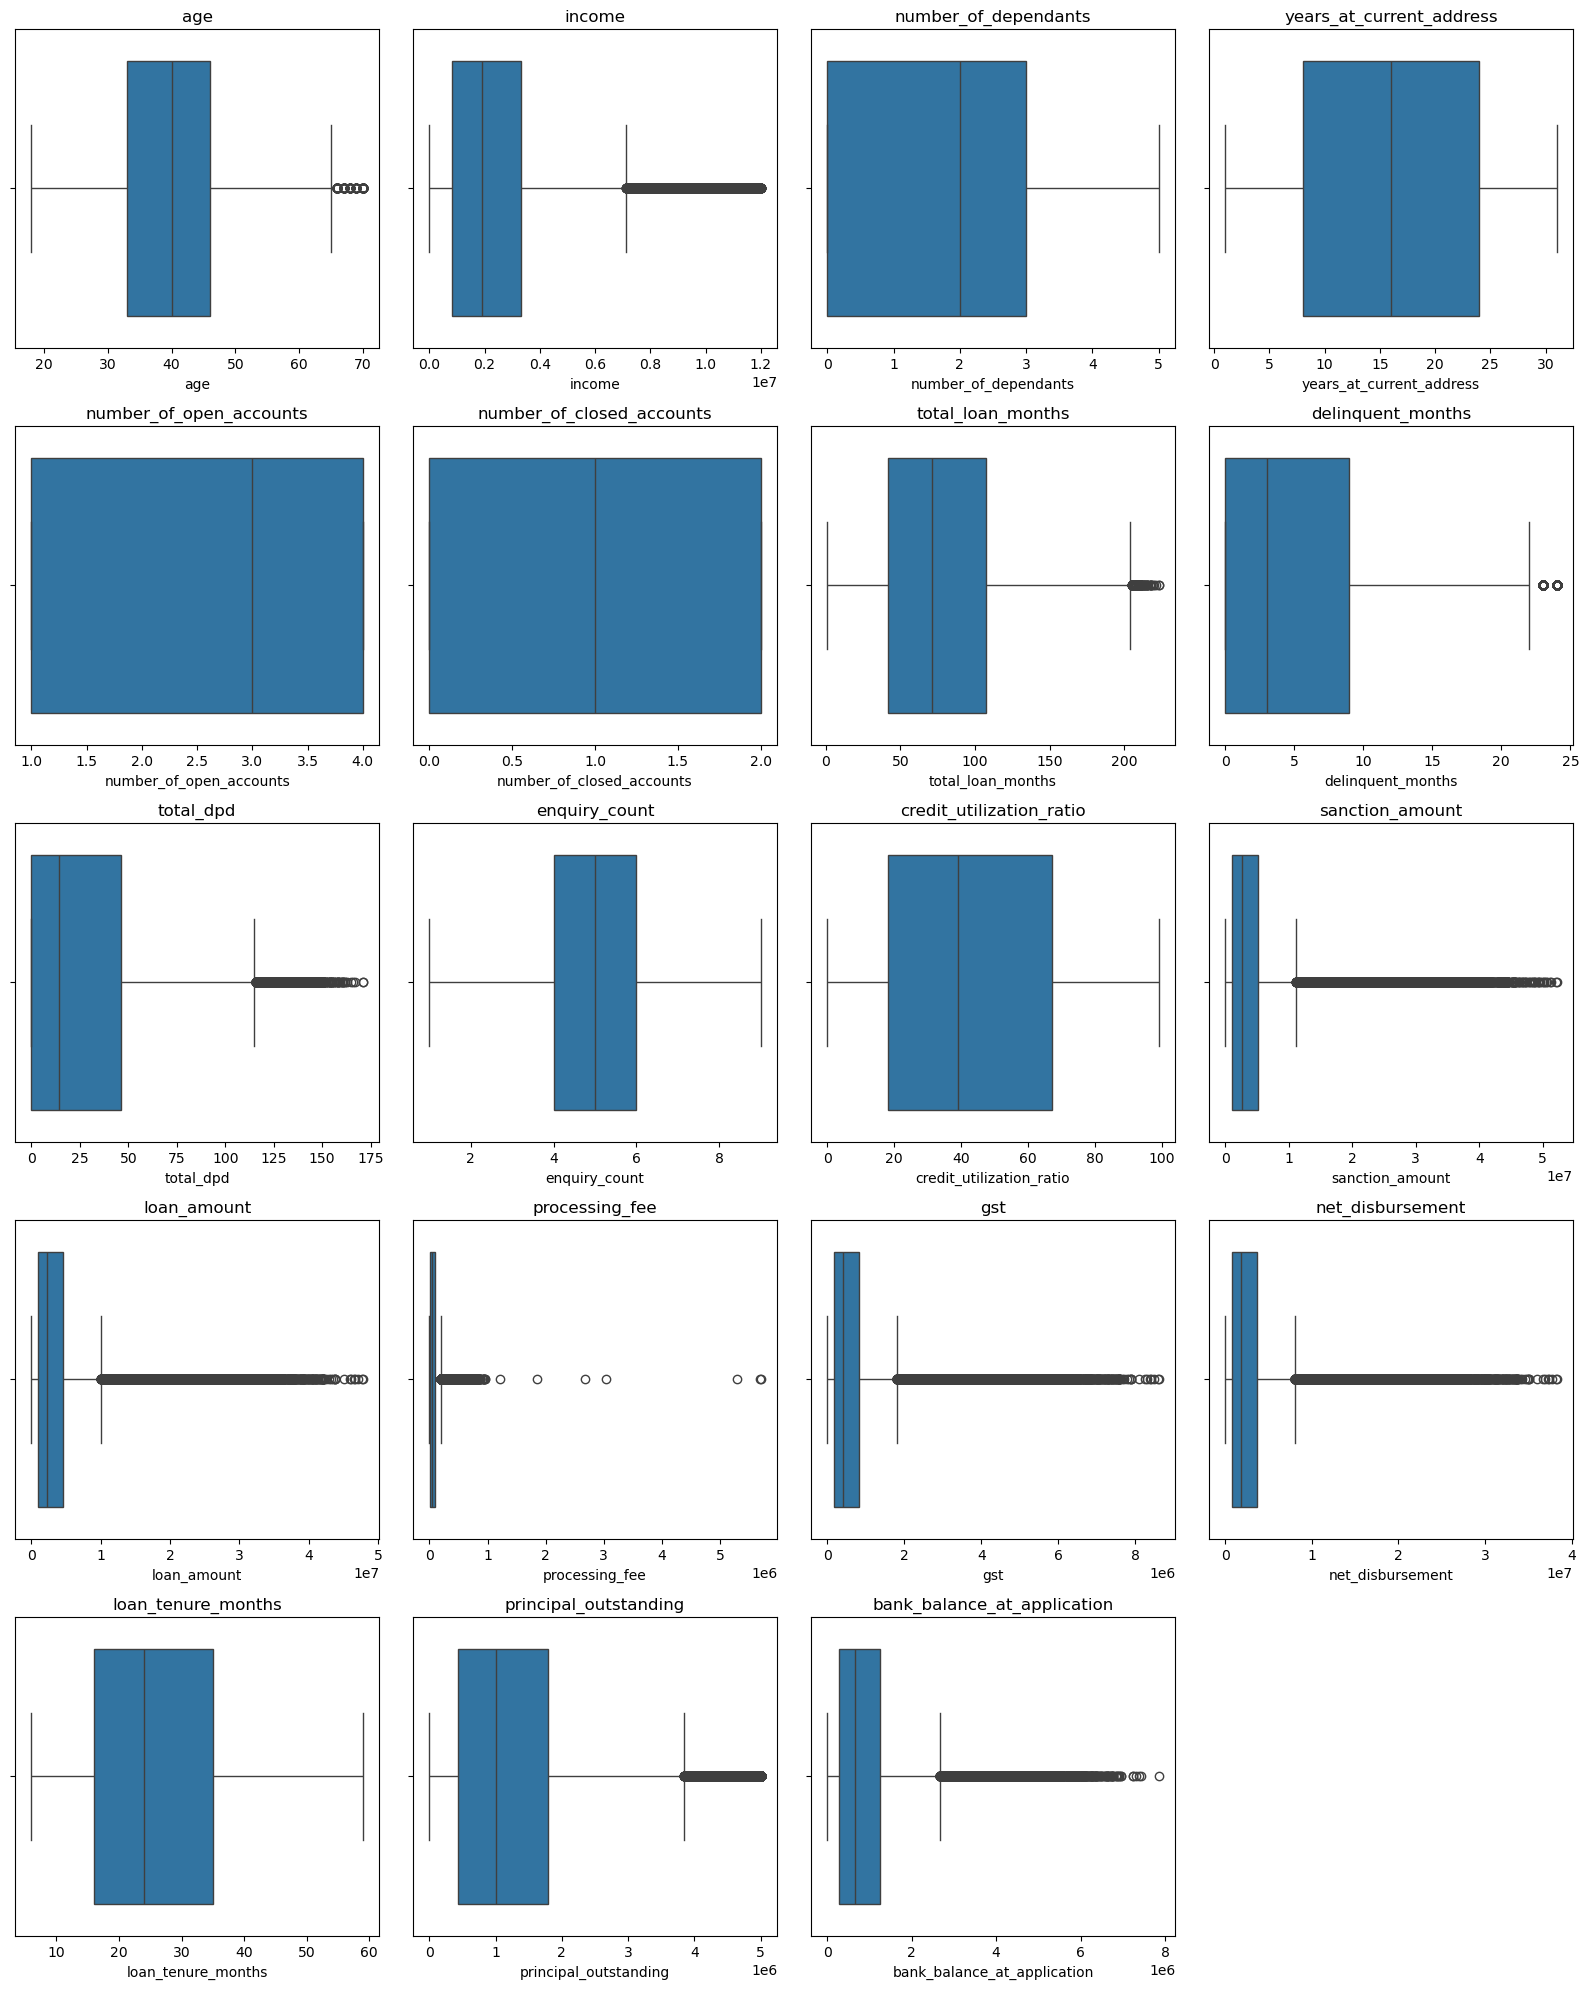

In [36]:
n_cols = len(continuous_columns)
n_rows = (n_cols + 3) // 4  # Calculate rows needed for 4 columns per row

fig, axes = plt.subplots(n_rows, 4, figsize=(16, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(continuous_columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)

# Hide empty subplots
for i in range(n_cols, n_rows * 4):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

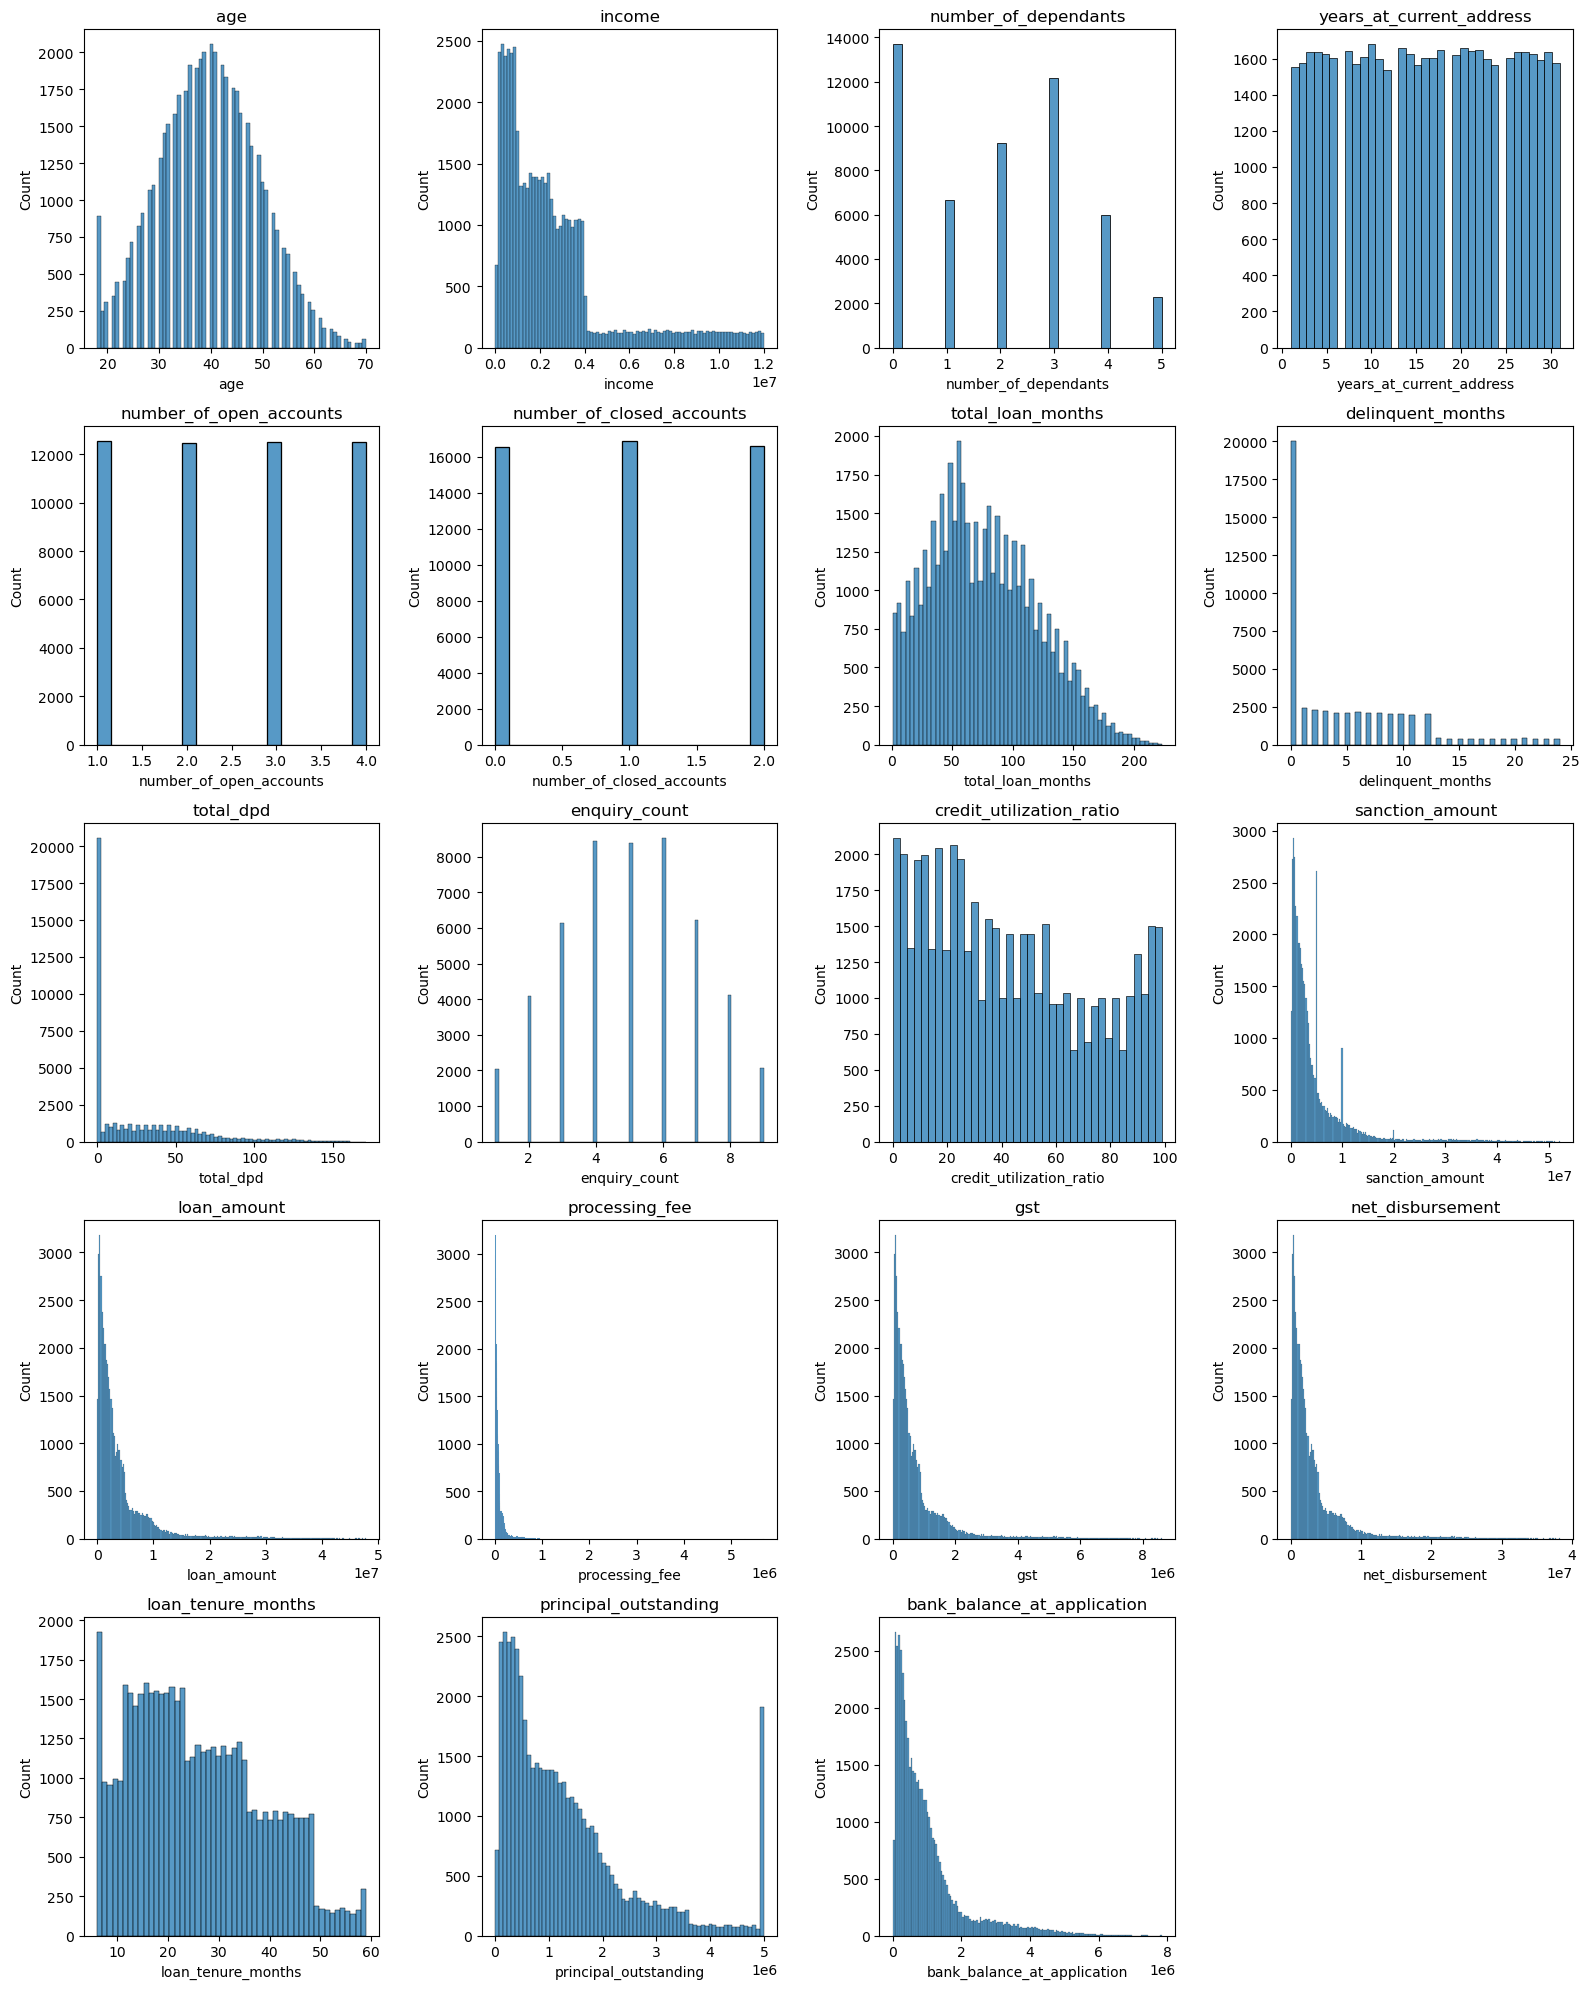

In [37]:
n_cols = len(continuous_columns)
n_rows = (n_cols + 3) // 4  # Calculate rows needed for 4 columns per row

fig, axes = plt.subplots(n_rows, 4, figsize=(16, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(continuous_columns):
    sns.histplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)

# Hide empty subplots
for i in range(n_cols, n_rows * 4):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [38]:
df_train['processing_fee'] = df_train['processing_fee'].fillna(0).astype(int)

In [39]:
df_train['processing_fee'].describe().astype('int64')

count      37500
mean       80290
std       113128
min            0
25%        19220
50%        44600
75%        92420
max      5293543
Name: processing_fee, dtype: int64

In [40]:
df_train[df_train['processing_fee']>df_train['loan_amount']][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791
28174,966000,1214492
47089,1738000,1858964
29305,2616000,3036378
9898,3626000,5293543


In [41]:
df_train[(df_train['processing_fee']/df_train['loan_amount']) >0.03][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791
28174,966000,1214492
47089,1738000,1858964
29305,2616000,3036378
9898,3626000,5293543


In [42]:
df_train_1 = df_train[(df_train['processing_fee']/df_train['loan_amount']) <0.03].copy()
df_train_1

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,23442000,468840,4219560,18753600,28,5000000,4820526,2020-10-31,2020-11-11,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,1149000,22980,206820,919200,50,467229,216697,2022-10-22,2022-10-27,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,11296000,225920,2033280,9036800,32,1656773,1383842,2023-12-04,2023-12-29,0
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,1695000,33900,305100,1356000,40,1023442,626203,2020-06-18,2020-07-07,0
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,905000,18100,162900,724000,15,651599,585099,2020-11-12,2020-12-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,C28516,70,M,Single,Self-Employed,2470000,0,Owned,20,Kolkata,...,1420000,28400,255600,1136000,12,1022399,501594,2022-05-30,2022-06-09,0
5558,C05559,39,F,Single,Salaried,2472000,0,Rented,26,Kolkata,...,2753000,55060,495540,2202400,32,1123466,587429,2020-02-12,2020-02-17,0
45236,C45237,39,M,Married,Self-Employed,1329000,4,Owned,10,Pune,...,4479000,89580,806220,3583200,38,913243,517025,2024-01-30,2024-02-04,1
49228,C49229,33,M,Single,Salaried,1274000,2,Owned,26,Chennai,...,1890000,37800,340200,1512000,37,635515,475147,2024-06-24,2024-07-21,0


In [43]:
df_test = df_test[(df_test['processing_fee']/df_test['loan_amount']) <0.03].copy()



In [44]:
categorical_columns

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_purpose',
 'loan_type',
 'default']

In [45]:
for col in categorical_columns :
    print(f' {col} ---> {df_train_1[col].unique()}')

 gender ---> ['M' 'F']
 marital_status ---> ['Married' 'Single']
 employment_status ---> ['Self-Employed' 'Salaried']
 residence_type ---> ['Owned' 'Mortgage' 'Rented']
 city ---> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
 state ---> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
 loan_purpose ---> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
 loan_type ---> ['Secured' 'Unsecured']
 default ---> [0 1]


In [46]:
df_train_1.loan_purpose.replace('Personaal', 'Personal' , inplace=True)
df_test.loan_purpose.replace('Personaal', 'Personal' , inplace=True)


/var/folders/mm/6cdy0j9x6bl5k77gk81jj1n40000gn/T/ipykernel_4150/1458363303.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_1.loan_purpose.replace('Personaal', 'Personal' , inplace=True)
/var/folders/mm/6cdy0j9x6bl5k77gk81jj1n40000gn/T/ipykernel_4150/1458363303.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

In [47]:
for col in categorical_columns :
    print(f' {col} ---> {df_train_1[col].unique()}')

 gender ---> ['M' 'F']
 marital_status ---> ['Married' 'Single']
 employment_status ---> ['Self-Employed' 'Salaried']
 residence_type ---> ['Owned' 'Mortgage' 'Rented']
 city ---> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
 state ---> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
 loan_purpose ---> ['Home' 'Education' 'Personal' 'Auto']
 loan_type ---> ['Secured' 'Unsecured']
 default ---> [0 1]


In [48]:
df_train_1[(df_train_1.gst/df_train_1.loan_amount)>0.2]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default


<h3>Mark Down </h3>

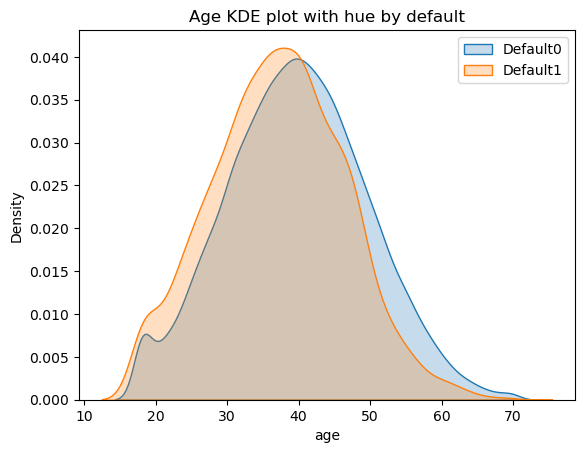

In [49]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['age'], fill=True ,label='Default0')
sns.kdeplot(df_train_1[df_train_1.default == 1]['age'], fill=True ,label='Default1')
plt.title('Age KDE plot with hue by default')
plt.legend()
plt.show()

Insights 
1. Orange graph is little bit shifted to the left of blue graph which indicates that people with young age are more likely to default

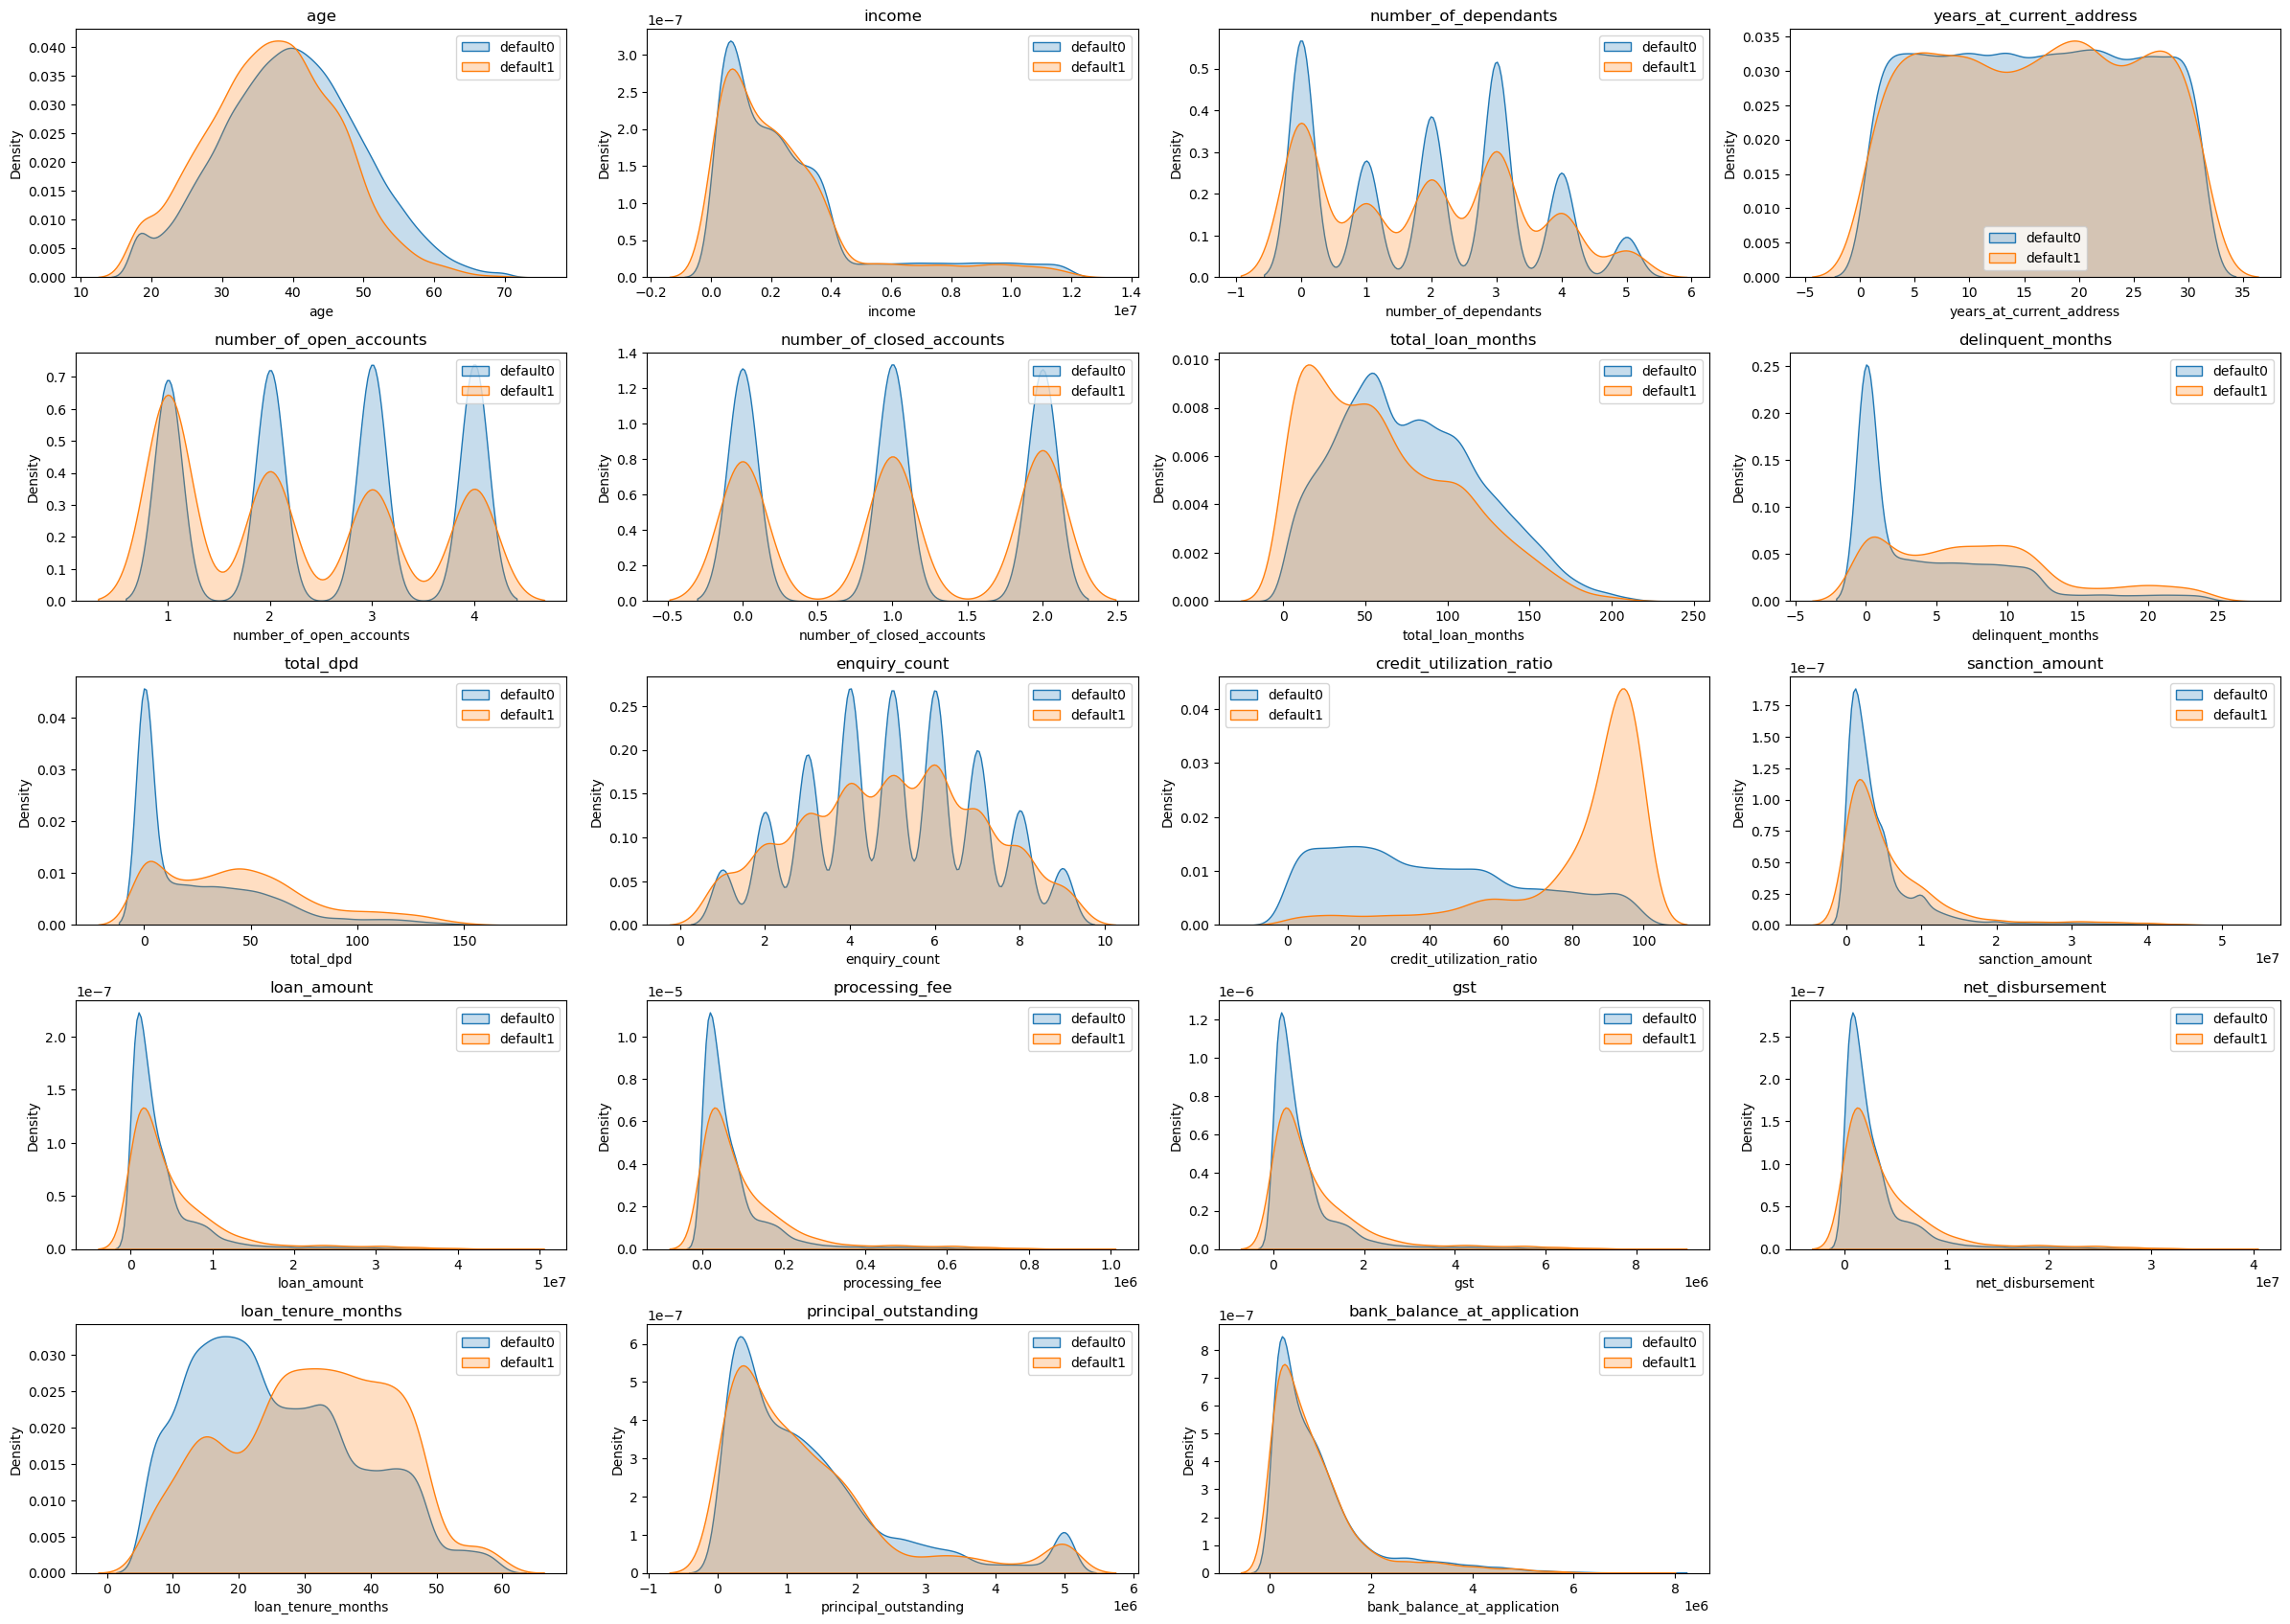

In [50]:
plt.figure(figsize=(24,20))

for i , col in enumerate(continuous_columns):
    plt.subplot(6,4, i+1)
    sns.kdeplot(df_train_1[col][df_train_1['default']==0], fill=True, label = 'default0')
    sns.kdeplot(df_train_1[col][df_train_1['default']==1], fill=True, label = 'default1')
    plt.legend()
    plt.title(col)
    
plt.tight_layout()
plt.show()
    

In [51]:
pd.set_option('display.float_format',lambda x : '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

In [52]:
df_train_1['loan_to_income'] = round(df_train_1['loan_amount']/df_train_1['income'],2)
df_train_1[['loan_to_income']]

df_test['loan_to_income'] = round(df_test['loan_amount']/df_test['income'],2)


In [53]:
df_train_1['credit_utilization_per_income'] = df_train_1['credit_utilization_ratio']/df_train_1['loan_to_income']
df_test['credit_utilization_per_income'] = df_test['credit_utilization_ratio']/df_test['loan_to_income']
df_train_1.head()


,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default,loan_to_income,credit_utilization_per_income
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,4219560,18753600,28,5000000,4820526,2020-10-31,2020-11-11,0,2.07,17.39
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,206820,919200,50,467229,216697,2022-10-22,2022-10-27,0,1.61,3.11
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2033280,9036800,32,1656773,1383842,2023-12-04,2023-12-29,0,3.54,0.00
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,305100,1356000,40,1023442,626203,2020-06-18,2020-07-07,0,1.13,76.99
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,162900,724000,15,651599,585099,2020-11-12,2020-12-07,0,0.50,142.00


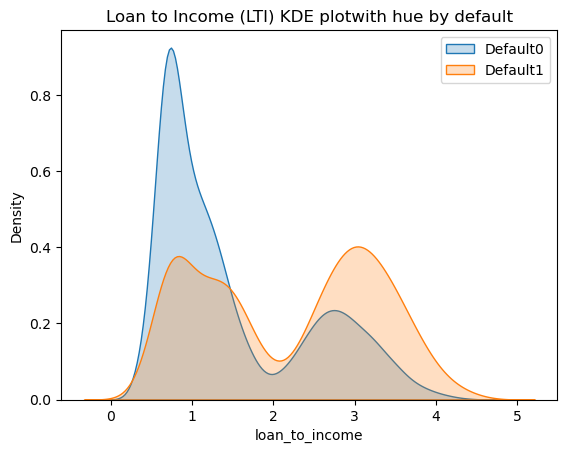

In [54]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['loan_to_income'], fill=True ,label='Default0')
sns.kdeplot(df_train_1[df_train_1.default == 1]['loan_to_income'], fill=True ,label='Default1')
plt.title('Loan to Income (LTI) KDE plotwith hue by default')
plt.legend()
plt.show()

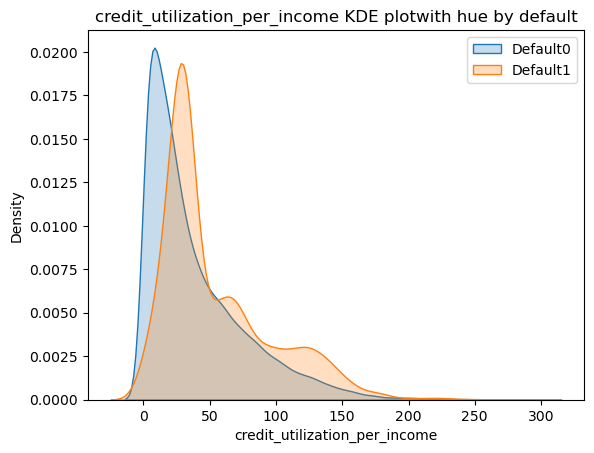

In [55]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['credit_utilization_per_income'], fill=True ,label='Default0')
sns.kdeplot(df_train_1[df_train_1.default == 1]['credit_utilization_per_income'], fill=True ,label='Default1')
plt.title('credit_utilization_per_income KDE plotwith hue by default')
plt.legend()
plt.show()

In [56]:
df_train_1['delinquency_ratio'] = (df_train_1['delinquent_months']/df_train_1['total_loan_months'])*100
df_train_1[['delinquent_months', 'total_loan_months' ,'delinquency_ratio' ]].head()
df_train_1['delinquency_ratio'].describe()

df_test['delinquency_ratio'] = (df_test['delinquent_months']/df_test['total_loan_months'])*100

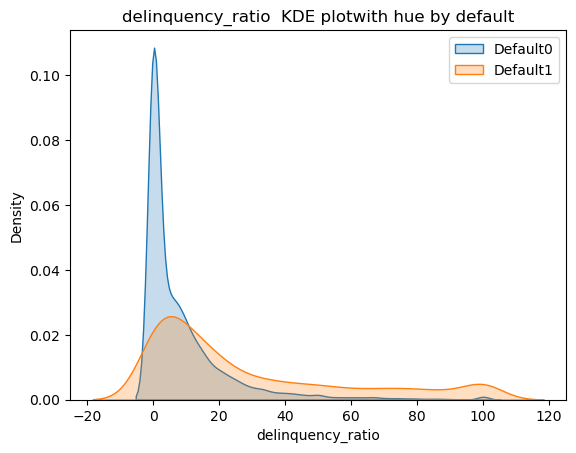

In [57]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['delinquency_ratio'], fill=True ,label='Default0')
sns.kdeplot(df_train_1[df_train_1.default == 1]['delinquency_ratio'], fill=True ,label='Default1')
plt.title('delinquency_ratio  KDE plotwith hue by default')
plt.legend()
plt.show()

In [58]:
df_train_1['avg_dpd_per_deliquency'] = np.where(df_train_1['delinquent_months'] !=0,(df_train_1['total_dpd']/ df_train_1['delinquent_months']).round(1),0)
df_train_1['avg_dpd_per_deliquency'].isna().sum()
df_train_1['avg_dpd_per_deliquency'].describe()

df_test['avg_dpd_per_deliquency'] = np.where(df_test['delinquent_months'] !=0,(df_test['total_dpd']/ df_test['delinquent_months']).round(1),0)

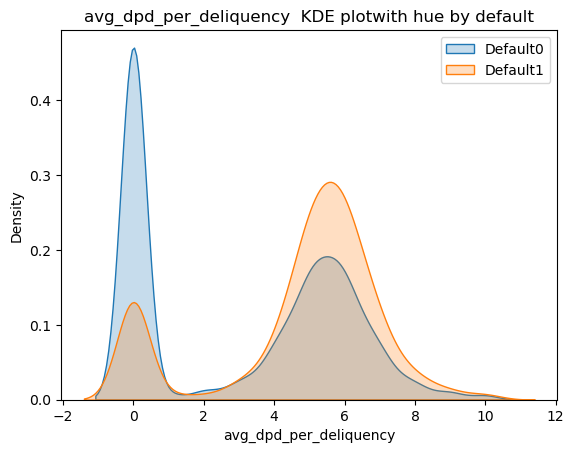

In [59]:
sns.kdeplot(df_train_1[df_train_1.default == 0]['avg_dpd_per_deliquency'], fill=True ,label='Default0')
sns.kdeplot(df_train_1[df_train_1.default == 1]['avg_dpd_per_deliquency'], fill=True ,label='Default1')
plt.title('avg_dpd_per_deliquency  KDE plotwith hue by default')
plt.legend()
plt.show()

### Feature Selection

In [60]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'loan_id', 'loan_purpose', 'loan_type',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'default', 'loan_to_income', 'credit_utilization_per_income',
       'delinquency_ratio', 'avg_dpd_per_deliquency'],
      dtype='object')

In [61]:
df_train_2 = df_train_1.drop(['cust_id', 'loan_id'], axis=1)
df_test = df_test.drop(['cust_id', 'loan_id'], axis=1)


In [62]:
df_train_3 = df_train_2.drop(['disbursal_date','installment_start_dt', 'loan_amount', 'income', 'total_dpd', 'total_loan_months','delinquent_months'], axis=1)

df_test = df_test.drop(['disbursal_date','installment_start_dt', 'loan_amount', 'income', 'total_dpd', 'total_loan_months','delinquent_months'], axis=1)

In [63]:
df_train_3.dtypes

age                                int64
gender                            object
marital_status                    object
employment_status                 object
number_of_dependants               int64
residence_type                    object
years_at_current_address           int64
city                              object
state                             object
zipcode                            int64
number_of_open_accounts            int64
number_of_closed_accounts          int64
enquiry_count                      int64
credit_utilization_ratio           int64
loan_purpose                      object
loan_type                         object
sanction_amount                    int64
processing_fee                     int64
gst                                int64
net_disbursement                   int64
loan_tenure_months                 int64
principal_outstanding              int64
bank_balance_at_application        int64
default                            int64
loan_to_income  

In [64]:
df_train_3.default = df_train_3.default.astype('int32')

In [65]:
df_train_3.select_dtypes(['int64', 'float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'sanction_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'loan_to_income',
       'credit_utilization_per_income', 'delinquency_ratio',
       'avg_dpd_per_deliquency'],
      dtype='object')

In [66]:
X_train = df_train_3.drop('default', axis=1)
y_train = df_train_3['default']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_scale = df_train_3.select_dtypes(['int64', 'float64']).columns

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,loan_to_income,credit_utilization_per_income,delinquency_ratio,avg_dpd_per_deliquency
count,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00
mean,0.41,0.39,0.50,0.52,0.50,0.50,0.50,0.44,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.29,0.14,0.10,0.33
std,0.19,0.31,0.30,0.29,0.37,0.41,0.25,0.30,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.23,0.13,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.00,0.00,0.38,0.18,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.11,0.04,0.00,0.00
50%,0.40,0.40,0.50,0.49,0.67,0.50,0.50,0.39,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.20,0.09,0.04,0.43
75%,0.54,0.60,0.77,0.76,1.00,1.00,0.62,0.68,0.10,0.10,0.10,0.10,0.55,0.35,0.16,0.51,0.20,0.13,0.57
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [67]:
X_test = df_test.drop('default', axis=1)
y_test = df_test['default']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,loan_to_income,credit_utilization_per_income,delinquency_ratio,avg_dpd_per_deliquency
count,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00
mean,0.42,0.38,0.50,0.53,0.50,0.50,0.50,0.44,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.29,0.14,0.11,0.33
std,0.19,0.31,0.30,0.29,0.37,0.41,0.25,0.30,0.12,0.11,0.11,0.11,0.23,0.25,0.13,0.23,0.13,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.00,0.00,0.38,0.18,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.11,0.04,0.00,0.00
50%,0.42,0.40,0.50,0.51,0.33,0.50,0.50,0.39,0.05,0.05,0.05,0.05,0.34,0.20,0.08,0.20,0.09,0.04,0.44
75%,0.54,0.60,0.77,0.76,0.67,1.00,0.62,0.68,0.10,0.09,0.09,0.09,0.55,0.36,0.16,0.50,0.20,0.13,0.58
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.98,0.96,0.96,0.96,1.00,1.00,0.94,1.00,0.96,1.00,1.00


In [68]:
X_test.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'loan_to_income',
       'credit_utilization_per_income', 'delinquency_ratio',
       'avg_dpd_per_deliquency'],
      dtype='object')

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['column'] = data.columns
    vif_df['coefficients'] = [variance_inflation_factor(data.values,i)for i in range(data.shape[1])]
    return vif_df



In [70]:
calculate_vif(X_train[cols_to_scale])

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,column,coefficients
0,age,5.93
1,number_of_dependants,2.73
2,years_at_current_address,3.44
3,zipcode,3.83
4,number_of_open_accounts,4.39
5,number_of_closed_accounts,2.39
6,enquiry_count,6.44
7,credit_utilization_ratio,10.44
8,sanction_amount,101.16
9,processing_fee,inf


In [71]:
features_to_drop_vif = ['processing_fee','gst','net_disbursement','net_disbursement','principal_outstanding', 'sanction_amount']
X_train_1 = X_train.drop(features_to_drop_vif, axis=1)
X_test = X_test.drop(features_to_drop_vif, axis=1)
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns


numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_tenure_months',
       'bank_balance_at_application', 'loan_to_income',
       'credit_utilization_per_income', 'delinquency_ratio',
       'avg_dpd_per_deliquency'],
      dtype='object')

In [72]:
vif_df = calculate_vif(X_train_1[numeric_columns])
vif_df

,column,coefficients
0,age,5.61
1,number_of_dependants,2.73
2,years_at_current_address,3.43
3,zipcode,3.81
4,number_of_open_accounts,4.35
5,number_of_closed_accounts,2.38
6,enquiry_count,6.42
7,credit_utilization_ratio,10.13
8,loan_tenure_months,6.21
9,bank_balance_at_application,1.89


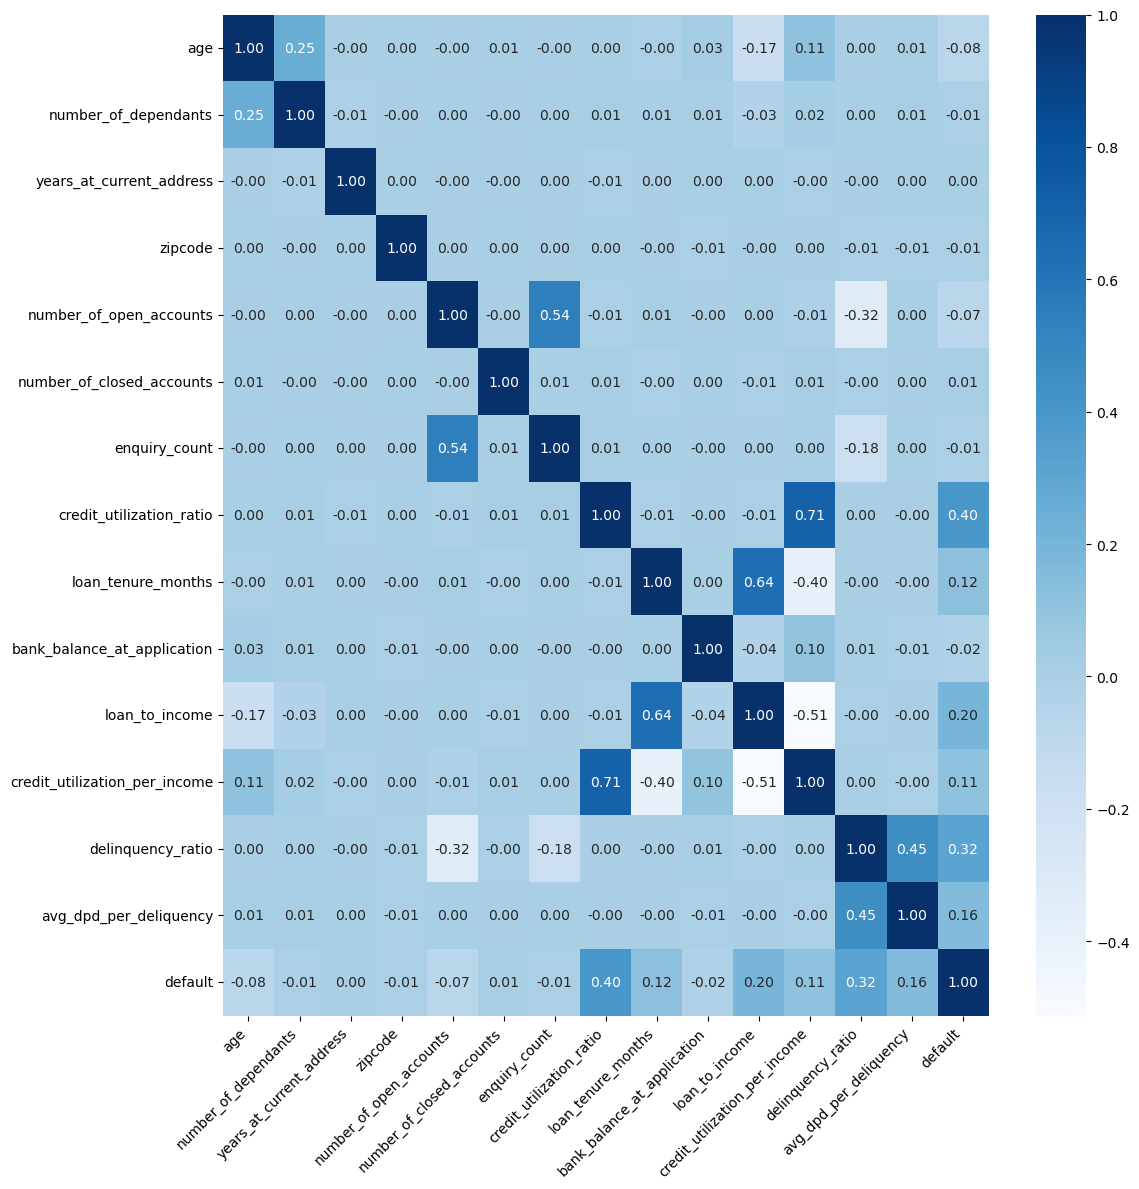

In [73]:
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm,annot=True , fmt = '0.2f', cmap='Blues')
plt.xticks(rotation=45, ha= 'right')
plt.tight_layout()
plt.show()

In [74]:
categorical_columns

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_purpose',
 'loan_type',
 'default']

In [75]:
temp = pd.concat([X_train_1,y_train], axis=1)
temp.groupby('loan_purpose')['default'].agg(['count','sum'])

,count,sum
loan_purpose,,
Auto,7447,327
Education,5620,559
Home,11304,1734
Personal,13117,603


In [76]:
def calculate_woe_iv(df,feature, target):
    grouped = df.groupby(feature)[target].agg(['count', 'sum'])

    grouped = grouped.rename(columns={'count':'total', 'sum':'good'})
    grouped['bad'] = grouped['total'] - grouped['good']
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad']/total_bad
    grouped['woe'] = np.log(grouped['good_pct']/grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct']- grouped['bad_pct'])*grouped['woe']

    grouped['woe'] = grouped['woe'].replace([np.inf , -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf , -np.inf], 0)

    total_iv = grouped['iv'].sum()

    return grouped , total_iv
    

In [77]:
grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1,y_train],axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.10,0.21,-0.72,0.08
Education,5620,559,5061,0.17,0.15,0.16,0.00
Home,11304,1734,9570,0.54,0.28,0.66,0.17
Personal,13117,603,12514,0.19,0.37,-0.67,0.12


In [78]:
total_iv

0.3691197842282755

In [79]:
pd.cut(X_train_1['loan_to_income'], bins =10)

12746       (0.4, 0.5]
32495       (0.3, 0.4]
43675       (0.7, 0.8]
9040        (0.1, 0.2]
13077    (-0.001, 0.1]
             ...      
28515    (-0.001, 0.1]
5558        (0.1, 0.2]
45236       (0.7, 0.8]
49228       (0.2, 0.3]
37784       (0.1, 0.2]
Name: loan_to_income, Length: 37488, dtype: category
Categories (10, interval[float64, right]): [(-0.001, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]

In [80]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype =='object':
        _ , iv = calculate_woe_iv(pd.concat([X_train_1,y_train],axis=1),feature,'default')
        iv_values[feature] = iv

    else :
        X_binned = pd.cut(X_train_1[feature], bins=10, labels = False)
        _ , iv = calculate_woe_iv(pd.concat([X_binned, y_train], axis=1),feature, 'default')
        iv_values[feature] = iv

iv_values

{'age': 0.0890689462679479,
 'gender': 0.00047449502170914947,
 'marital_status': 0.001129766845390142,
 'employment_status': 0.003953046301722585,
 'number_of_dependants': 0.0019380899135053508,
 'residence_type': 0.246745268718145,
 'years_at_current_address': 0.0020800513608156363,
 'city': 0.0019059578709781529,
 'state': 0.0019005589806779287,
 'zipcode': 0.0016677413243392572,
 'number_of_open_accounts': 0.08463134083005877,
 'number_of_closed_accounts': 0.0011964272592421567,
 'enquiry_count': 0.007864214085342608,
 'credit_utilization_ratio': 2.352965568168245,
 'loan_purpose': 0.3691197842282755,
 'loan_type': 0.16319324904149224,
 'loan_tenure_months': 0.21893515090196278,
 'bank_balance_at_application': 0.0063187993277516365,
 'loan_to_income': 0.476415456948364,
 'credit_utilization_per_income': 0.19552785320955066,
 'delinquency_ratio': 0.716576108689321,
 'avg_dpd_per_deliquency': 0.40151905412190175}

In [81]:
pd.set_option('display.float_format', lambda x : '{:.3f}'.format(x))


iv_df = pd.DataFrame(iv_values.items(),columns=['feature', 'iv'])
iv_df.sort_values(by='iv', ascending=False,inplace=True)
iv_df

,feature,iv
13,credit_utilization_ratio,2.353
20,delinquency_ratio,0.717
18,loan_to_income,0.476
21,avg_dpd_per_deliquency,0.402
14,loan_purpose,0.369
5,residence_type,0.247
16,loan_tenure_months,0.219
19,credit_utilization_per_income,0.196
15,loan_type,0.163
0,age,0.089


In [82]:
selected_features_iv = [feature for feature,iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'loan_to_income',
 'credit_utilization_per_income',
 'delinquency_ratio',
 'avg_dpd_per_deliquency']

### Feature Encoding

In [83]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [84]:
X_train_reduced.head()

,age,residence_type,number_of_open_accounts,credit_utilization_ratio,loan_purpose,loan_type,loan_tenure_months,loan_to_income,credit_utilization_per_income,delinquency_ratio,avg_dpd_per_deliquency
12746,0.788,Owned,1.000,0.364,Home,Secured,0.415,0.415,0.060,0.132,0.590
32495,0.500,Owned,0.667,0.051,Education,Secured,0.830,0.307,0.011,0.062,0.620
43675,0.385,Mortgage,0.000,0.000,Home,Secured,0.491,0.759,0.000,0.222,0.560
9040,0.462,Mortgage,0.667,0.879,Education,Secured,0.642,0.194,0.264,0.000,0.000
13077,0.769,Owned,0.000,0.717,Personal,Unsecured,0.170,0.047,0.488,0.000,0.000


In [85]:
X_train_encoded = pd.get_dummies(X_train_reduced,drop_first=True)
X_test_encoded =  pd.get_dummies(X_test_reduced, drop_first=True)


X_train_encoded

,age,number_of_open_accounts,credit_utilization_ratio,loan_tenure_months,loan_to_income,credit_utilization_per_income,delinquency_ratio,avg_dpd_per_deliquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788,1.000,0.364,0.415,0.415,0.060,0.132,0.590,True,False,False,True,False,False
32495,0.500,0.667,0.051,0.830,0.307,0.011,0.062,0.620,True,False,True,False,False,False
43675,0.385,0.000,0.000,0.491,0.759,0.000,0.222,0.560,False,False,False,True,False,False
9040,0.462,0.667,0.879,0.642,0.194,0.264,0.000,0.000,False,False,True,False,False,False
13077,0.769,0.000,0.717,0.170,0.047,0.488,0.000,0.000,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,1.000,0.333,0.131,0.113,0.063,0.078,0.000,0.000,True,False,False,False,True,True
5558,0.404,0.000,0.444,0.491,0.190,0.136,0.269,0.510,False,True,False,False,False,False
45236,0.404,1.000,0.980,0.604,0.719,0.099,0.085,0.400,True,False,False,True,False,False
49228,0.288,0.333,0.253,0.585,0.276,0.058,0.000,0.000,True,False,True,False,False,False


In [86]:
X_test_encoded.columns

Index(['age', 'number_of_open_accounts', 'credit_utilization_ratio',
       'loan_tenure_months', 'loan_to_income', 'credit_utilization_per_income',
       'delinquency_ratio', 'avg_dpd_per_deliquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [87]:
X_train_encoded.columns

Index(['age', 'number_of_open_accounts', 'credit_utilization_ratio',
       'loan_tenure_months', 'loan_to_income', 'credit_utilization_per_income',
       'delinquency_ratio', 'avg_dpd_per_deliquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [89]:

l_model = LogisticRegression()
l_model.fit(X_train_encoded,y_train)

y_pred = l_model.predict(X_test_encoded)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [90]:
from xgboost import XGBClassifier

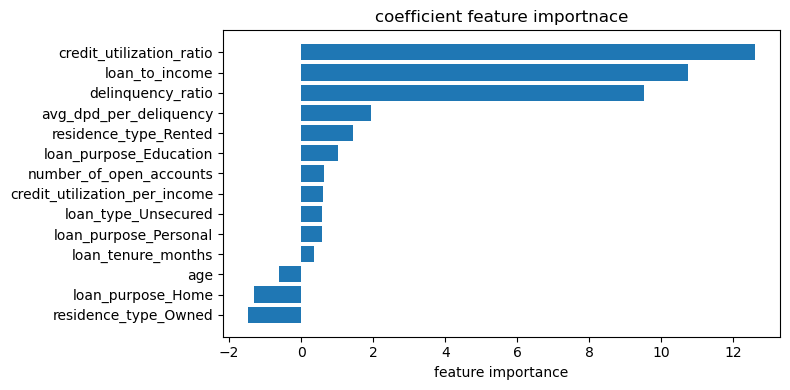

In [91]:
feature_importance = l_model.coef_[0]

coef_df = pd.DataFrame(feature_importance , index=X_train_encoded.columns , columns=['coefficient'])
coef_df = coef_df.sort_values(by=['coefficient'], ascending=True)

plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['coefficient'])
plt.xlabel('feature importance')
plt.title('coefficient feature importnace')
plt.tight_layout()
plt.show()

In [92]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.97     12497
   macro avg       0.91      0.86      0.88     12497
weighted avg       0.96      0.97      0.96     12497



In [93]:
model = XGBClassifier()

model = XGBClassifier()
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.82      0.75      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.87      0.88     12497
weighted avg       0.96      0.96      0.96     12497



Since there is not much difference between XGB and Logistic, we will choose LogisticRegression as a candidate for our RandomizedSearchCV candidate it has a better interpretation.

#### RandomizedSearch CV for Attempt 1: Logistic Regression

In [94]:
from sklearn.model_selection import RandomizedSearchCV

param_dict = {
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs', 'saga', 'liblinear', 'newton-cg'] }

log_reg = LogisticRegression(max_iter= 1000)

random_search = RandomizedSearchCV(
    estimator= log_reg ,
    param_distributions= param_dict,
    n_iter=50,
    scoring= 'f1',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_encoded,y_train)

print(f' best parameters : {random_search.best_params_}')
print(f' best score : {random_search.best_score_}')


best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)

report = classification_report(y_test,y_pred)
print(report)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END ............C=0.08858667904100823, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ............C=0.08858667904100823, solver=newton-cg; total time=   0.0s
[CV] END ............C=0.08858667904100823, solver=newton-cg; total time=   0.0s
[CV] END ............C=0.08858667904100823, solver=liblinear; total time=   0.0s
[CV] END ............C=0.08858667904100823, solver=newton-cg; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END .............................C=0.0001, solver=lbfgs; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ................C=0.08858667904100823, solver=lbfgs; total time=   0.0s
[CV] END ............C=0.08858667904100823, sol

In [95]:

print(f' best parameters : {random_search.best_params_}')
print(f' best score : {random_search.best_score_}')

 best parameters : {'solver': 'lbfgs', 'C': 545.5594781168514}
 best score : 0.7584212624750669


In [96]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.74      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [97]:
from scipy.stats import uniform ,randint

param_dict = {
        'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions = param_dict ,
    n_iter = 100,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42

)

random_search.fit(X_train_encoded,y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.15, 0.2, 0.25,
                                                          0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300],
                                        'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0,
                                                      10.0],
                                        'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0,
                                                       10.0],
                                        'scale_pos_weight': [1, 2, 3, 5, 7, 10],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='f1', verbose=1)

In [98]:
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7875824689511735
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.77      0.84      0.80      1074

    accuracy                           0.96     12497
   macro avg       0.88      0.91      0.89     12497
weighted avg       0.97      0.96      0.97     12497



### Attempt 2

1. Logistic Regression & XGB
1. Handle Class Imbalance Using Under Sampling

In [99]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus , y_train_rus = rus.fit_resample(X_train_encoded, y_train) 
y_train_rus.value_counts()

default
0    3223
1    3223
Name: count, dtype: int64

In [100]:
model = LogisticRegression()

model.fit(X_train_rus, y_train_rus)
y_pred = model.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.95      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [101]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_rus,y_train_rus)

y_pred = model.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.98      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.95      0.81     12497
weighted avg       0.96      0.92      0.93     12497



### Attempt 3

1. Logistic Regression
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [102]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)

X_train_tomek , y_train_tomek = smt.fit_resample(X_train_encoded , y_train)

y_train_tomek.value_counts()



default
0    34211
1    34211
Name: count, dtype: int64

In [103]:
model = LogisticRegression()
model.fit(X_train_tomek , y_train_tomek)

y_pred = model.predict(X_test_encoded)

report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [104]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [105]:
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4,1e4 , log = True),
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),
        'tol' : trial.suggest_float('tol', 1e-6, 1e-1, log=True),
        'class_weight': trial.suggest_categorical('class_weight', [None,'balanced'])
    }
    model = LogisticRegression(**param, max_iter =10000)

    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_tomek, y_train_tomek, cv=3 , scoring = f1_scorer , n_jobs = -1)

    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective,n_trials = 50)


[I 2025-10-17 16:21:21,126] A new study created in memory with name: no-name-9cf464e4-fd88-4c96-bbb9-54961a8a56d1
[I 2025-10-17 16:21:21,359] Trial 0 finished with value: 0.8770134861366575 and parameters: {'C': 0.0004214096120612301, 'solver': 'saga', 'tol': 0.0004672651922718245, 'class_weight': None}. Best is trial 0 with value: 0.8770134861366575.
[I 2025-10-17 16:21:21,473] Trial 1 finished with value: 0.9415759336516905 and parameters: {'C': 0.12285062197536226, 'solver': 'lbfgs', 'tol': 1.6709311168704987e-06, 'class_weight': None}. Best is trial 1 with value: 0.9415759336516905.
[I 2025-10-17 16:21:21,575] Trial 2 finished with value: 0.945949479637686 and parameters: {'C': 1.276857353720967, 'solver': 'lbfgs', 'tol': 2.0401288362662738e-05, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.945949479637686.
[I 2025-10-17 16:21:21,679] Trial 3 finished with value: 0.944331983553098 and parameters: {'C': 172.6714625878513, 'solver': 'liblinear', 'tol': 0.0619485534158811

In [106]:
study_logistic.best_params

{'C': 70.14641721309914,
 'solver': 'saga',
 'tol': 0.0307961697882977,
 'class_weight': None}

In [107]:
study_logistic.best_value

0.9463386044168852

In [108]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_tomek, y_train_tomek, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-10-17 16:21:27,345] A new study created in memory with name: no-name-35dc4eae-c131-4b63-8864-b7cce8d1b1fb
[I 2025-10-17 16:21:27,851] Trial 0 finished with value: 0.967481576697416 and parameters: {'lambda': 0.05381659392300834, 'alpha': 0.6507665132439701, 'subsample': 0.4727273624151649, 'colsample_bytree': 0.9409984522263973, 'max_depth': 10, 'eta': 0.09547162894748232, 'gamma': 3.153143077347421, 'scale_pos_weight': 7.565746582392517, 'min_child_weight': 5, 'max_delta_step': 9}. Best is trial 0 with value: 0.967481576697416.
[I 2025-10-17 16:21:28,141] Trial 1 finished with value: 0.9211877817358749 and parameters: {'lambda': 0.003806151302277548, 'alpha': 0.002622870590960979, 'subsample': 0.6143863589584627, 'colsample_bytree': 0.9022616302151426, 'max_depth': 5, 'eta': 0.018939084057484557, 'gamma': 4.305133434739693, 'scale_pos_weight': 4.8728801703421745, 'min_child_weight': 7, 'max_delta_step': 0}. Best is trial 0 with value: 0.967481576697416.
[I 2025-10-17 16:21:28,

In [109]:
study_xgb.best_params

{'lambda': 0.2568770023204865,
 'alpha': 0.9340702071575852,
 'subsample': 0.8428103889511458,
 'colsample_bytree': 0.791947515449279,
 'max_depth': 9,
 'eta': 0.25155023369922164,
 'gamma': 0.45483763615593625,
 'scale_pos_weight': 1.4189979368794492,
 'min_child_weight': 1,
 'max_delta_step': 10}

In [110]:
study_xgb.best_value


0.9765673374954472

In [111]:
study_xgb.best_trial


FrozenTrial(number=34, state=1, values=[0.9765673374954472], datetime_start=datetime.datetime(2025, 10, 17, 16, 21, 39, 11615), datetime_complete=datetime.datetime(2025, 10, 17, 16, 21, 39, 397753), params={'lambda': 0.2568770023204865, 'alpha': 0.9340702071575852, 'subsample': 0.8428103889511458, 'colsample_bytree': 0.791947515449279, 'max_depth': 9, 'eta': 0.25155023369922164, 'gamma': 0.45483763615593625, 'scale_pos_weight': 1.4189979368794492, 'min_child_weight': 1, 'max_delta_step': 10}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'lambda': FloatDistribution(high=10.0, log=True, low=0.001, step=None), 'alpha': FloatDistribution(high=10.0, log=True, low=0.001, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.4, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.4, step=None), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'eta': FloatDistribution(high=0.3, log=False, low=0.01, step=None), 'g

In [112]:
print('best trial: ')
trial = study_xgb.best_trial
print(f'f1 score : {study_xgb.best_value}')
print('params :')
for key , value in trial.params.items():
    print('{}: {}'.format(key,value))

best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_tomek, y_train_tomek)

y_pred = best_model_xgb.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)


best trial: 
f1 score : 0.9765673374954472
params :
lambda: 0.2568770023204865
alpha: 0.9340702071575852
subsample: 0.8428103889511458
colsample_bytree: 0.791947515449279
max_depth: 9
eta: 0.25155023369922164
gamma: 0.45483763615593625
scale_pos_weight: 1.4189979368794492
min_child_weight: 1
max_delta_step: 10
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11423
           1       0.73      0.84      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.86      0.90      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [113]:
from sklearn.metrics import roc_curve

In [114]:
best_model_logistics = LogisticRegression(**study_logistic.best_params)
best_model_logistics.fit(X_train_tomek,y_train_tomek)

LogisticRegression(C=70.14641721309914, solver='saga', tol=0.0307961697882977)

### Model Evaluation using ROC AUC


In [115]:
probabilities = best_model_logistics.predict_proba(X_test_encoded)[:,1]
probabilities

array([0.47569376, 0.0000059 , 0.00428707, ..., 0.00344558, 0.84325671,
       0.59997966])

In [116]:
fpr, tpr , threshold = roc_curve(y_test, probabilities)

fpr[:10], tpr[:10], threshold[:10]

(array([0.        , 0.        , 0.        , 0.00008754, 0.00008754,
        0.00017509, 0.00017509, 0.00026263, 0.00026263, 0.00035017]),
 array([0.        , 0.0009311 , 0.15735568, 0.15735568, 0.17225326,
        0.17225326, 0.21880819, 0.21880819, 0.23649907, 0.23649907]),
 array([       inf, 1.        , 0.99956024, 0.99955423, 0.99945829,
        0.99943779, 0.9988772 , 0.99887708, 0.99861165, 0.99857328]))

In [117]:
from sklearn.metrics import auc

area = auc(fpr, tpr)

area

0.9837513781450766

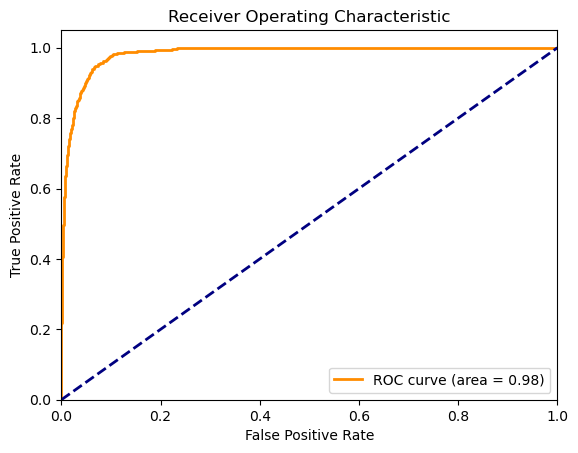

In [118]:
plt.figure()
plt.plot(fpr,tpr, color = 'darkorange', lw=2 , label='ROC curve (area = %0.2f)' % area)
plt.plot([0,1], [0,1], color = 'navy', lw =2 , linestyle= '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Model Evaluation : Rankordering, KS statistic, Gini coeff


In [119]:
probabilities = best_model_logistics.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'default truth' : y_test,
    'default probability' : probabilities
})

df_eval.head()

,default truth,default probability
19205,0,0.476
15514,0,0.000
30367,0,0.004
35347,0,0.005
41814,1,0.899


In [120]:
df_eval['decile'] = pd.qcut(df_eval['default probability'], q=10 , labels= False , duplicates = 'drop')

In [121]:
df_eval.head()

,default truth,default probability,decile
19205,0,0.476,8
15514,0,0.000,2
30367,0,0.004,6
35347,0,0.005,6
41814,1,0.899,9


In [122]:
df_eval[df_eval.decile == 8]['default probability'].describe()

count   1250.000
mean       0.457
std        0.185
min        0.187
25%        0.291
50%        0.437
75%        0.613
max        0.805
Name: default probability, dtype: float64

In [123]:
df_decile = df_eval.groupby('decile').apply(lambda x : pd.Series({
    'minimum probability' : x['default probability'].min(),
    'maximum probability' : x['default probability'].max(),
    'events' : x['default truth'].sum(),
    'non-events' : x['default truth'].count() - x['default truth'].sum()

}))

df_decile.reset_index(inplace=True)
df_decile

/var/folders/mm/6cdy0j9x6bl5k77gk81jj1n40000gn/T/ipykernel_4150/1999065291.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('decile').apply(lambda x : pd.Series({


,decile,minimum probability,maximum probability,events,non-events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1249.000
3,3,0.000,0.000,0.000,1250.000
4,4,0.000,0.000,0.000,1250.000
5,5,0.000,0.003,0.000,1249.000
6,6,0.003,0.022,2.000,1248.000
7,7,0.022,0.186,13.000,1236.000
8,8,0.187,0.805,160.000,1090.000
9,9,0.805,1.000,899.000,351.000


In [124]:
df_decile['event rate'] = df_decile['events']*100 / (df_decile['events']+df_decile['non-events'])
df_decile['non-event rate'] = df_decile['non-events']*100 / (df_decile['events']+df_decile['non-events'])
df_decile

,decile,minimum probability,maximum probability,events,non-events,event rate,non-event rate
0,0,0.000,0.000,0.000,1250.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
2,2,0.000,0.000,0.000,1249.000,0.000,100.000
3,3,0.000,0.000,0.000,1250.000,0.000,100.000
4,4,0.000,0.000,0.000,1250.000,0.000,100.000
5,5,0.000,0.003,0.000,1249.000,0.000,100.000
6,6,0.003,0.022,2.000,1248.000,0.160,99.840
7,7,0.022,0.186,13.000,1236.000,1.041,98.959
8,8,0.187,0.805,160.000,1090.000,12.800,87.200
9,9,0.805,1.000,899.000,351.000,71.920,28.080


In [125]:
df_decile = df_decile.sort_values(by='decile', ascending=False).reset_index(drop=True)
df_decile

,decile,minimum probability,maximum probability,events,non-events,event rate,non-event rate
0,9,0.805,1.000,899.000,351.000,71.920,28.080
1,8,0.187,0.805,160.000,1090.000,12.800,87.200
2,7,0.022,0.186,13.000,1236.000,1.041,98.959
3,6,0.003,0.022,2.000,1248.000,0.160,99.840
4,5,0.000,0.003,0.000,1249.000,0.000,100.000
5,4,0.000,0.000,0.000,1250.000,0.000,100.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [126]:
df_decile['cum events'] = df_decile['events'].cumsum()
df_decile['cum non-events'] = df_decile['non-events'].cumsum()
df_decile

,decile,minimum probability,maximum probability,events,non-events,event rate,non-event rate,cum events,cum non-events
0,9,0.805,1.000,899.000,351.000,71.920,28.080,899.000,351.000
1,8,0.187,0.805,160.000,1090.000,12.800,87.200,1059.000,1441.000
2,7,0.022,0.186,13.000,1236.000,1.041,98.959,1072.000,2677.000
3,6,0.003,0.022,2.000,1248.000,0.160,99.840,1074.000,3925.000
4,5,0.000,0.003,0.000,1249.000,0.000,100.000,1074.000,5174.000
5,4,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,6424.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000


In [127]:
df_decile['cum events rate'] = df_decile['cum events']*100 / df_decile['events'].sum()
df_decile['cum non-event rate'] = df_decile['cum non-events']*100 / df_decile['non-events'].sum()
df_decile

,decile,minimum probability,maximum probability,events,non-events,event rate,non-event rate,cum events,cum non-events,cum events rate,cum non-event rate
0,9,0.805,1.000,899.000,351.000,71.920,28.080,899.000,351.000,83.706,3.073
1,8,0.187,0.805,160.000,1090.000,12.800,87.200,1059.000,1441.000,98.603,12.615
2,7,0.022,0.186,13.000,1236.000,1.041,98.959,1072.000,2677.000,99.814,23.435
3,6,0.003,0.022,2.000,1248.000,0.160,99.840,1074.000,3925.000,100.000,34.361
4,5,0.000,0.003,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295
5,4,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000


In [128]:
df_decile['ks'] = abs(df_decile['cum events rate']- df_decile['cum non-event rate'])
df_decile

,decile,minimum probability,maximum probability,events,non-events,event rate,non-event rate,cum events,cum non-events,cum events rate,cum non-event rate,ks
0,9,0.805,1.000,899.000,351.000,71.920,28.080,899.000,351.000,83.706,3.073,80.633
1,8,0.187,0.805,160.000,1090.000,12.800,87.200,1059.000,1441.000,98.603,12.615,85.988
2,7,0.022,0.186,13.000,1236.000,1.041,98.959,1072.000,2677.000,99.814,23.435,76.379
3,6,0.003,0.022,2.000,1248.000,0.160,99.840,1074.000,3925.000,100.000,34.361,65.639
4,5,0.000,0.003,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295,54.705
5,4,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237,43.763
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180,32.820
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114,21.886
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057,10.943
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000,0.000


To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

Events and Non-Events terms are interchanged based on usecase to usecase.

eg: for marketing usecase, which customer to reach out (who will take loan based on offers) will be events - here it will termed as good, and the customers who will not take loans will be non-events (bad).

**Insights from the Decile Table**

1. Top Deciles

* The first decile (Decile 9) has a high event rate of 72.00% and a non-event rate of 28.00%. This indicates that the model is highly confident in predicting events in this decile.
* The second decile (Decile 8) also shows a significant event rate of 12.72%, with a cumulative event rate reaching 98.6%.

2. Middle Deciles:

* Deciles 7 and 6 show a significant drop in event rates

3. Lower Deciles:

* Deciles 5 to 0 show zero events, with all predictions being non-events. These deciles collectively have a non-event rate of 100%.

4. KS Statistic:

* The KS statistic, which is the maximum difference between cumulative event rates and cumulative non-event rates, is highest at Decile 8 with a value of 85.98%. This suggests that the model performs best at distinguishing between events and non-events up to this decile.

* The KS value gradually decreases in the following deciles, indicating a decrease in model performance for distinguishing between events and non-events.

**KS Value**

The highest KS value is 85.98%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)

In [129]:
gini_coefficient = 2*area -1


print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9837513781450766
Gini Coefficient: 0.9675027562901533


AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

#### Finalize The Model and Visualize Feature Importance

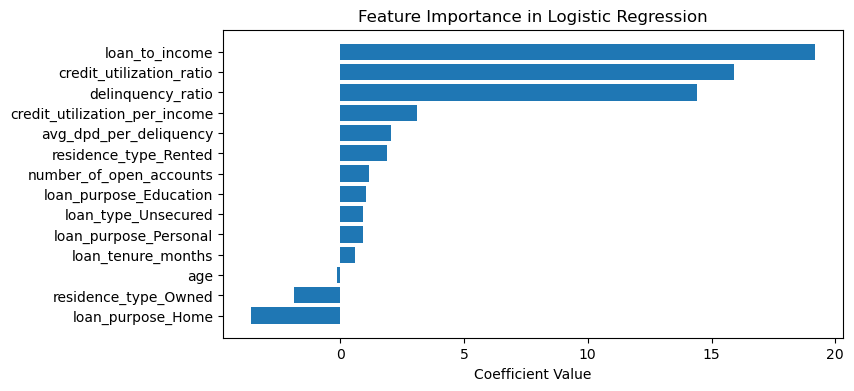

In [130]:
final_model_logistics = best_model_logistics

feature_importance = final_model_logistics.coef_[0]

coef_df = pd.DataFrame(feature_importance , index= X_train_encoded.columns , columns=['coefficients'])

coef_df = coef_df.sort_values(by='coefficients', ascending=True)



plt.figure(figsize=(8, 4))
plt.barh(coef_df.index , coef_df['coefficients'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Save the Model

In [131]:
X_test_encoded.head(2)

,age,number_of_open_accounts,credit_utilization_ratio,loan_tenure_months,loan_to_income,credit_utilization_per_income,delinquency_ratio,avg_dpd_per_deliquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346,0.333,0.990,0.755,0.550,0.127,0.000,0.000,True,False,False,True,False,False
15514,0.481,1.000,0.323,0.226,0.220,0.089,0.000,0.000,True,False,True,False,False,False


In [132]:
X_test_encoded.columns

Index(['age', 'number_of_open_accounts', 'credit_utilization_ratio',
       'loan_tenure_months', 'loan_to_income', 'credit_utilization_per_income',
       'delinquency_ratio', 'avg_dpd_per_deliquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [133]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'sanction_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'loan_to_income',
       'credit_utilization_per_income', 'delinquency_ratio',
       'avg_dpd_per_deliquency'],
      dtype='object')

In [134]:
from joblib import dump

model_data = {
    'model' : final_model_logistics,
    'features' : X_train_encoded.columns,
    'scaler' : scaler,
    'cols_to_scale' : cols_to_scale
}

dump(model_data, 'artifacts/model_data.joblib')



['artifacts/model_data.joblib']

In [135]:
final_model_logistics.coef_, final_model_logistics.intercept_

(array([[-0.14200526,  1.17243596, 15.8877011 ,  0.58828525, 19.17107394,
          3.11367909, 14.41952992,  2.0300376 , -1.88889667,  1.89937735,
          1.04528524, -3.60176049,  0.92521134,  0.92521134]]),
 array([-22.06578985]))

In [136]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'sanction_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'loan_to_income',
       'credit_utilization_per_income', 'delinquency_ratio',
       'avg_dpd_per_deliquency'],
      dtype='object')

In [137]:
X_train_encoded.columns

Index(['age', 'number_of_open_accounts', 'credit_utilization_ratio',
       'loan_tenure_months', 'loan_to_income', 'credit_utilization_per_income',
       'delinquency_ratio', 'avg_dpd_per_deliquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [138]:
len(X_train_encoded.columns)

14

In [139]:
df_train_2.head()

,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default,loan_to_income,credit_utilization_per_income,delinquency_ratio,avg_dpd_per_deliquency
12746,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,Telangana,...,28,5000000,4820526,2020-10-31,2020-11-11,0,2.070,17.391,13.158,5.900
32495,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,Maharashtra,...,50,467229,216697,2022-10-22,2022-10-27,0,1.610,3.106,6.250,6.200
43675,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,Tamil Nadu,...,32,1656773,1383842,2023-12-04,2023-12-29,0,3.540,0.000,22.222,5.600
9040,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,Karnataka,...,40,1023442,626203,2020-06-18,2020-07-07,0,1.130,76.991,0.000,0.000
13077,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,Maharashtra,...,15,651599,585099,2020-11-12,2020-12-07,0,0.500,142.000,0.000,0.000


In [140]:
'''# !pip install bayes_opt scikit-learn  # uncomment if needed

import BayesianOptimization
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report
import numpy as np

# ==== your data ====
# X_train_encoded, y_train_encoded, X_test_encoded, y_test_encoded

# ==== config ====
RANDOM_STATE = 42
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
is_multiclass = len(np.unique(y_train_encoded)) > 2
scoring_name = "roc_auc_ovr" if is_multiclass else "roc_auc"

# Optional: flip to True if classes are imbalanced
USE_CLASS_WEIGHT_BALANCED = False

def cv_auc(log10_C, l1_ratio):
    """Objective for BayesianOptimization (maximize mean CV ROC AUC)."""
    C = 10.0 ** log10_C  # search C in log-space
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(
            solver="saga",                 # supports elastic-net
            penalty="elasticnet",
            l1_ratio=float(l1_ratio),     # [0,1]
            C=float(C),
            max_iter=5000,
            n_jobs=-1,
            random_state=RANDOM_STATE,
            class_weight=("balanced" if USE_CLASS_WEIGHT_BALANCED else None)
        ))
    ])
    scores = cross_val_score(
        pipe,
        X_train_encoded,
        y_train_encoded,
        scoring=scoring_name,
        cv=cv,
        n_jobs=-1
    )
    return scores.mean()

# ==== search space & optimization ====
pbounds = {"log10_C": (-4.0, 2.0), "l1_ratio": (0.0, 1.0)}  # C in [1e-4, 1e2]

optimizer = BayesianOptimization(
    f=cv_auc,
    pbounds=pbounds,
    random_state=RANDOM_STATE,
    verbose=2
)

# Try a few random points, then optimize with EI
optimizer.maximize(init_points=8, n_iter=25, acq="ei")

best = optimizer.max["params"]
best_C = 10.0 ** best["log10_C"]
best_l1 = best["l1_ratio"]
print(f"Best params → C={best_C:.6f}, l1_ratio={best_l1:.4f}")
print(f"Best CV {scoring_name} = {optimizer.max['target']:.5f}")

# ==== fit final model on full train set ====
final_model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        solver="saga",
        penalty="elasticnet",
        l1_ratio=best_l1,
        C=best_C,
        max_iter=5000,
        n_jobs=-1,
        random_state=RANDOM_STATE,
        class_weight=("balanced" if USE_CLASS_WEIGHT_BALANCED else None)
    ))
])
final_model.fit(X_train_encoded, y_train_encoded)

# ==== evaluate on test set ====
y_proba = final_model.predict_proba(X_test_encoded)
y_pred = final_model.predict(X_test_encoded)

if is_multiclass:
    test_auc = roc_auc_score(y_test_encoded, y_proba, multi_class="ovr")
else:
    test_auc = roc_auc_score(y_test_encoded, y_proba[:, 1])

print(f"Test ROC AUC: {test_auc:.5f}")
print(f"Test Accuracy: {accuracy_score(y_test_encoded, y_pred):.5f}")
print(f"Test F1 (macro): {f1_score(y_test_encoded, y_pred, average='macro'):.5f}")
print("\nClassification report:\n", classification_report(y_test_encoded, y_pred))
'''

'# !pip install bayes_opt scikit-learn  # uncomment if needed\n\nimport BayesianOptimization\n#from sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import StratifiedKFold, cross_val_score\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report\nimport numpy as np\n\n# ==== your data ====\n# X_train_encoded, y_train_encoded, X_test_encoded, y_test_encoded\n\n# ==== config ====\nRANDOM_STATE = 42\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)\nis_multiclass = len(np.unique(y_train_encoded)) > 2\nscoring_name = "roc_auc_ovr" if is_multiclass else "roc_auc"\n\n# Optional: flip to True if classes are imbalanced\nUSE_CLASS_WEIGHT_BALANCED = False\n\ndef cv_auc(log10_C, l1_ratio):\n    """Objective for BayesianOptimization (maximize mean CV ROC AUC)."""\n    C = 10.0 ** log10_C  # search C in log-space\n    pipe =

In [143]:
from bayes_opt import BayesianOptimization
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report
import numpy as np

RANDOM_STATE = 42
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
is_multiclass = len(np.unique(y_train_tomek)) > 2
scoring_name = "roc_auc_ovr" if is_multiclass else "roc_auc"

def cv_auc(log10_C, l1_ratio):
    C = 10.0 ** log10_C
    model = LogisticRegression(
        solver="saga",
        penalty="elasticnet",
        l1_ratio=float(l1_ratio),
        C=float(C),
        max_iter=5000,
        n_jobs=-1,
        random_state=RANDOM_STATE
    )
    scores = cross_val_score(
        model, X_train_tomek, y_train_tomek,
        scoring=scoring_name,
        cv=cv,
        n_jobs=-1
    )
    return scores.mean()

# --- Define search space ---
pbounds = {"log10_C": (-4.0, 2.0), "l1_ratio": (0.0, 1.0)}

optimizer = BayesianOptimization(
    f=cv_auc,
    pbounds=pbounds,
    random_state=RANDOM_STATE,
    verbose=2
)

# ✅ Fixed line — remove "acq" argument
optimizer.maximize(init_points=8, n_iter=25)

best = optimizer.max["params"]
best_C = 10.0 ** best["log10_C"]
best_l1 = best["l1_ratio"]

print(f"Best parameters -> C={best_C:.6f}, l1_ratio={best_l1:.4f}")
print(f"Best CV {scoring_name} = {optimizer.max['target']:.5f}")

# ---- Fit final model ----
final_model = LogisticRegression(
    solver="saga",
    penalty="elasticnet",
    l1_ratio=best_l1,
    C=best_C,
    max_iter=5000,
    n_jobs=-1,
    random_state=RANDOM_STATE
)
final_model.fit(X_train_tomek, y_train_tomek)

y_pred = final_model.predict(X_test_encoded)
y_proba = final_model.predict_proba(X_test_encoded)

if is_multiclass:
    test_auc = roc_auc_score(y_test, y_proba, multi_class="ovr")
else:
    test_auc = roc_auc_score(y_test, y_proba[:, 1])

print(f"\nTest ROC AUC: {test_auc:.5f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Test F1 (macro): {f1_score(y_test, y_pred, average='macro'):.5f}")
print("\nClassification report:\n", classification_report(y_test, y_pred))


|   iter    |  target   |  log10_C  | l1_ratio  |
-------------------------------------------------
| 1         | 0.9846495 | -1.752759 | 0.9507143 |
| 2         | 0.9855772 | 0.3919636 | 0.5986584 |
| 3         | 0.9690578 | -3.063888 | 0.1559945 |
| 4         | 0.8789232 | -3.651498 | 0.8661761 |
| 5         | 0.9855900 | -0.393309 | 0.7080725 |
| 6         | 0.5       | -3.876493 | 0.9699098 |
| 7         | 0.9855696 | 0.9946558 | 0.2123391 |
| 8         | 0.9727459 | -2.909050 | 0.1834045 |
| 9         | 0.9855721 | 0.7603074 | 0.3625503 |
| 10        | 0.9855805 | 0.4583479 | 0.3076536 |
| 11        | 0.9855774 | 0.7013857 | 0.0419203 |
| 12        | 0.9855620 | 1.8666031 | 0.8373350 |
| 13        | 0.9855891 | -0.010365 | 0.6060059 |
| 14        | 0.9855878 | 0.0947901 | 0.2714797 |
| 15        | 0.9855636 | -0.287242 | 0.3477029 |
| 16        | 0.9605695 | -3.308843 | 0.6806405 |
| 17        | 0.9854419 | -0.672947 | 0.4406480 |
| 18        | 0.9855675 | 1.0933175 | 0.2970363 |


In [144]:
param_dict_small = {
    'n_estimators': [200, 300],
    'max_depth': [4, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1],      # SMOTE/Tomek already balanced
    'reg_alpha': [0.0, 0.1, 1.0], # L1
    'reg_lambda': [1.0, 5.0]      # L2
}



In [145]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()

grid = GridSearchCV(
    estimator=xgb,
    param_grid= param_dict_small,
    scoring ='roc_auc',
    cv=5,
    n_jobs =-1,
    verbose =2

)
grid.fit(X_train_tomek,y_train_tomek)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=200, reg_alpha=0.0, reg_lambda=1.0, scale_pos_weight=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=200, reg_alpha=0.0, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=200, reg_alpha=0.0, reg_lambda=1.0, scale_pos_weight=1, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=200, reg_alpha=0.0, reg_lambda=1.0, scale_pos_weight=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=200, reg_alpha=0.0, reg_lambda=1.0, scale_pos_weight=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, n_estimators=200, reg_alpha=0.0, reg_l

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1], 'max_depth': [4, 6],
                         'n_estimators': [200, 300],
                         'reg_alpha': [0.0, 0.1, 1.0], 'reg_lambda': [1.0, 5.0],
                         'scale_pos_weight': [1], 'subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=2)

In [146]:
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [147]:
grid.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 300,
 'reg_alpha': 0.0,
 'reg_lambda': 1.0,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [148]:
grid.best_score_

0.9981225357756269

In [149]:
best_xgb = grid.best_estimator_

In [151]:
import shap

In [ ]:
explainer = shap.TreeExplainer(best_xgb)

In [153]:
shap_values = explainer.shap_values(X_test_encoded)

base_value = explainer.expected_value

shap_values

array([[-0.13992828, -0.38855922,  4.3837333 , ..., -0.02671103,
        -0.1325047 ,  0.        ],
       [-0.30407274,  0.4739553 , -4.7606983 , ...,  0.00185592,
        -0.0955812 ,  0.        ],
       [-0.86093783, -0.00988986, -0.6471956 , ...,  0.00270007,
        -0.1748365 ,  0.        ],
       ...,
       [-0.264966  , -0.31197172, -3.459643  , ..., -0.00442213,
         0.19861464,  0.        ],
       [-0.5737701 , -0.4265429 ,  0.8871161 , ..., -0.02387012,
        -0.06627158,  0.        ],
       [-0.4262147 , -0.0643151 ,  2.4700842 , ..., -0.00343346,
         0.3235329 ,  0.        ]], dtype=float32)

In [154]:
base_value

0.004836239

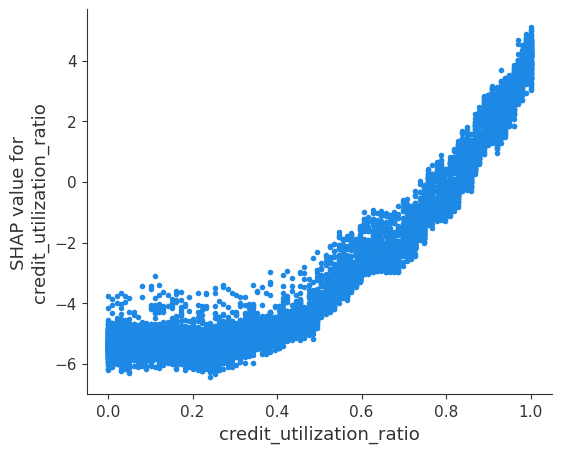

In [155]:
shap.dependence_plot(
    'credit_utilization_ratio',   # feature name
    shap_values,
    X_test_encoded,
    interaction_index=None        # set to another feature name for 2D interaction view
)

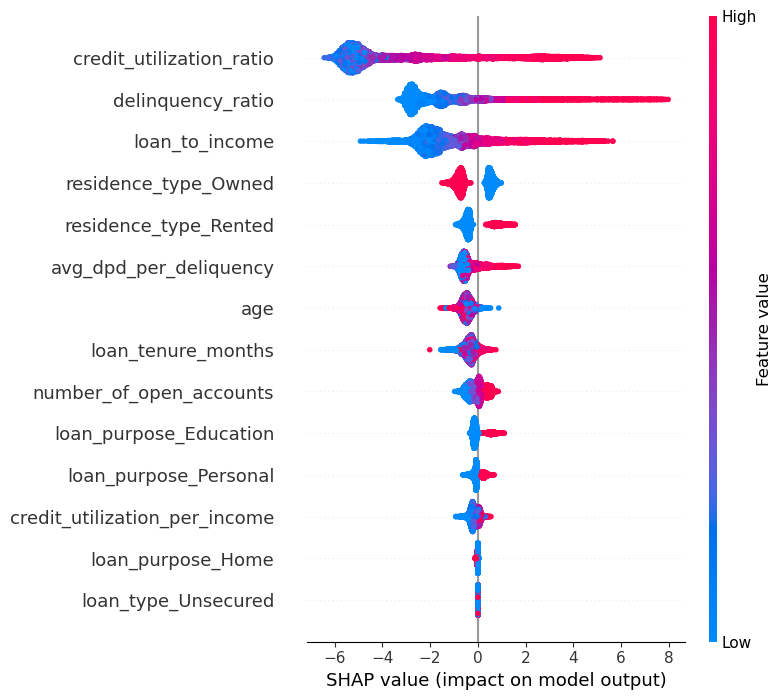

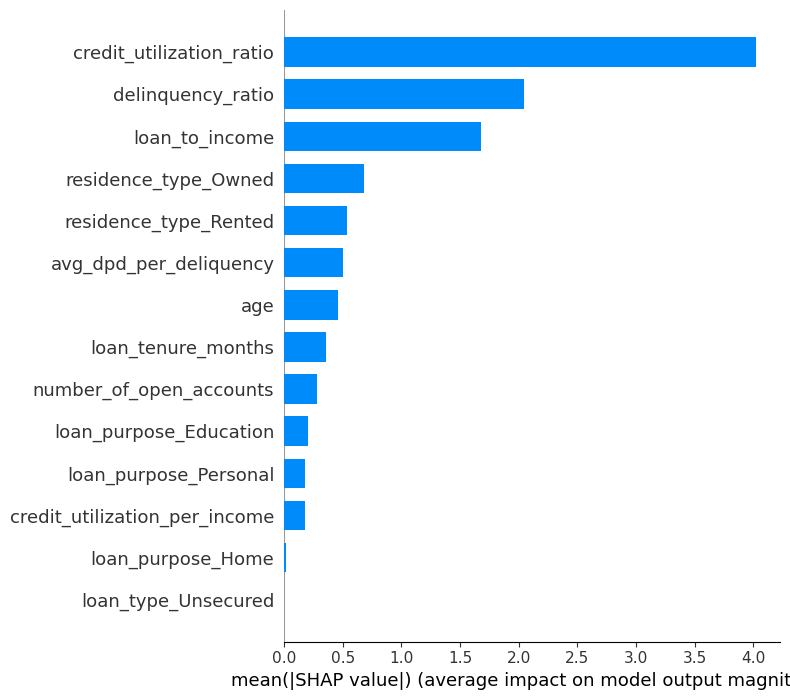

In [157]:
# Summary dot plot (global feature importance + direction of effect)
shap.summary_plot(shap_values, X_test_encoded, feature_names=getattr(X_test_encoded, "columns", None))

# Bar plot (mean |SHAP| per feature)
shap.summary_plot(shap_values, X_test_encoded, plot_type="bar",
                  feature_names=getattr(X_test_encoded, "columns", None))
